# **Zadanie č.1 (I-SUNS)**

## **Príprava dát:**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, f1_score, r2_score
from sklearn import preprocessing
import locale as loc
import ast

pd.set_option("display.max_columns", None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data_df = pd.read_csv('/content/drive/MyDrive/SUNS/datasets/z1_train.csv')
test_data_df = pd.read_csv('/content/drive/MyDrive/SUNS/datasets/z1_test.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


---
### **Trénovacie dáta:**

#### **Povodné dáta:**

In [ ]:
train_data_df

,D_appid,D_name,positive,negative,score,D_reviews,D_owners,coming_soon,D_release_date,D_genre,VYMAZAT_price,is_free,ccu,english,languages,D_tags,D_developer,D_publisher,publisher_est,developer_est,self_published,has_dlc,has_website_linked,has_controller_support,is_single_player,is_multi_player,is_early_access,mature_content,Addictive,Beautiful,Classic,Competitive,Cult Classic,Difficult,Emotional,Epic,Funny,Lore-Rich,Masterpiece,Replay Value,Short,Well-Written
0,10,Counter-Strike,193046,4940,0.975049,Overwhelmingly positive,"10,000,000 .. 20,000,000",False,"1 Nov, 2000",Action,999.0,False,16360,True,8.0,"{'Action': 5379, 'FPS': 4801, 'Multiplayer': 3...",Valve,Valve,33.0,29.0,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
1,20,Team Fortress Classic,5412,895,0.858094,Very Positive,"5,000,000 .. 10,000,000",False,"1 Apr, 1999",Action,499.0,False,87,True,9.0,"{'Action': 745, 'FPS': 306, 'Multiplayer': 257...",Valve,Valve,33.0,29.0,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False
2,30,Day of Defeat,5003,556,0.899982,Very Positive,"5,000,000 .. 10,000,000",False,"1 May, 2003",Action,499.0,False,122,True,5.0,"{'FPS': 787, 'World War II': 248, 'Multiplayer...",Valve,Valve,33.0,29.0,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
3,40,Deathmatch Classic,1852,412,0.818021,Very Positive,"5,000,000 .. 10,000,000",False,"1 Jun, 2001",Action,499.0,False,7,True,9.0,"{'Action': 629, 'FPS': 139, 'Classic': 107, 'M...",Valve,Valve,33.0,29.0,True,False,False,False,False,True,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False
4,50,Half-Life: Opposing Force,13262,662,0.952456,Overwhelmingly positive,"5,000,000 .. 10,000,000",False,"1 Nov, 1999",Action,499.0,False,122,True,4.0,"{'FPS': 881, 'Action': 322, 'Classic': 251, 'S...",Gearbox Software,Valve,33.0,13.0,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62864,1899430,NaN,0,0,NaN,Negative,"0 .. 20,000",True,NaN,NaN,NaN,False,0,NaN,NaN,[],NaN,NaN,NaN,NaN,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62865,1899990,GEHENA,0,0,NaN,Negative,"0 .. 20,000",True,NaN,NaN,NaN,False,0,NaN,NaN,[],NaN,NaN,NaN,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62866,1900820,NaN,0,0,NaN,Negative,"0 .. 20,000",True,NaN,NaN,NaN,False,0,NaN,NaN,[],NaN,NaN,NaN,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62867,1901700,TRADER LIFE SIMULATOR 2,0,0,NaN,Negative,"0 .. 20,000",True,NaN,NaN,NaN,False,0,NaN,NaN,[],NaN,NaN,NaN,NaN,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in train_data_df:
  print(column + ' : ' + str(train_data_df[column].isna().sum()) + '/' +  str(train_data_df.shape[0]))

D_appid : 0/62869
D_name : 96/62869
positive : 0/62869
negative : 0/62869
score : 15442/62869
D_reviews : 0/62869
D_owners : 0/62869
coming_soon : 53/62869
D_release_date : 10546/62869
D_genre : 7245/62869
VYMAZAT_price : 7060/62869
is_free : 0/62869
ccu : 0/62869
english : 7086/62869
languages : 7086/62869
D_tags : 0/62869
D_developer : 7193/62869
D_publisher : 7159/62869
publisher_est : 7159/62869
developer_est : 7193/62869
self_published : 0/62869
has_dlc : 0/62869
has_website_linked : 0/62869
has_controller_support : 0/62869
is_single_player : 156/62869
is_multi_player : 156/62869
is_early_access : 0/62869
mature_content : 0/62869
Addictive : 0/62869
Beautiful : 0/62869
Classic : 0/62869
Competitive : 0/62869
Cult Classic : 0/62869
Difficult : 0/62869
Emotional : 0/62869
Epic : 0/62869
Funny : 0/62869
Lore-Rich : 0/62869
Masterpiece : 0/62869
Replay Value : 0/62869
Short : 0/62869
Well-Written : 0/62869


#### **Odstránenie a premenovanie stĺpcov:**

In [ ]:
train_data_df = train_data_df.drop('D_appid', axis=1)
train_data_df = train_data_df.drop('D_name', axis=1)
train_data_df = train_data_df.drop('VYMAZAT_price', axis=1)
train_data_df = train_data_df.drop('positive', axis=1)
train_data_df = train_data_df.drop('negative', axis=1)
train_data_df = train_data_df.drop('D_developer', axis=1)
train_data_df = train_data_df.drop('D_publisher', axis=1)
train_data_df = train_data_df.drop('coming_soon', axis=1)
train_data_df = train_data_df.drop('D_reviews', axis=1)
train_data_df = train_data_df.drop('D_genre', axis=1)
train_data_df = train_data_df.drop('publisher_est', axis=1)
train_data_df = train_data_df.drop('developer_est', axis=1)

train_data_df = train_data_df.rename({'Short': 'Short_'}, axis=1)

In [ ]:
train_data_df

,score,D_owners,D_release_date,is_free,ccu,english,languages,D_tags,self_published,has_dlc,has_website_linked,has_controller_support,is_single_player,is_multi_player,is_early_access,mature_content,Addictive,Beautiful,Classic,Competitive,Cult Classic,Difficult,Emotional,Epic,Funny,Lore-Rich,Masterpiece,Replay Value,Short_,Well-Written
0,0.975049,"10,000,000 .. 20,000,000","1 Nov, 2000",False,16360,True,8.0,"{'Action': 5379, 'FPS': 4801, 'Multiplayer': 3...",True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
1,0.858094,"5,000,000 .. 10,000,000","1 Apr, 1999",False,87,True,9.0,"{'Action': 745, 'FPS': 306, 'Multiplayer': 257...",True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False
2,0.899982,"5,000,000 .. 10,000,000","1 May, 2003",False,122,True,5.0,"{'FPS': 787, 'World War II': 248, 'Multiplayer...",True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
3,0.818021,"5,000,000 .. 10,000,000","1 Jun, 2001",False,7,True,9.0,"{'Action': 629, 'FPS': 139, 'Classic': 107, 'M...",True,False,False,False,False,True,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False
4,0.952456,"5,000,000 .. 10,000,000","1 Nov, 1999",False,122,True,4.0,"{'FPS': 881, 'Action': 322, 'Classic': 251, 'S...",False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62864,NaN,"0 .. 20,000",NaN,False,0,NaN,NaN,[],False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62865,NaN,"0 .. 20,000",NaN,False,0,NaN,NaN,[],False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62866,NaN,"0 .. 20,000",NaN,False,0,NaN,NaN,[],False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62867,NaN,"0 .. 20,000",NaN,False,0,NaN,NaN,[],False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in train_data_df:
  print(column + ' : ' + str(train_data_df[column].isna().sum()) + '/' +  str(train_data_df.shape[0]))

score : 15442/62869
D_owners : 0/62869
D_release_date : 10546/62869
is_free : 0/62869
ccu : 0/62869
english : 7086/62869
languages : 7086/62869
D_tags : 0/62869
self_published : 0/62869
has_dlc : 0/62869
has_website_linked : 0/62869
has_controller_support : 0/62869
is_single_player : 156/62869
is_multi_player : 156/62869
is_early_access : 0/62869
mature_content : 0/62869
Addictive : 0/62869
Beautiful : 0/62869
Classic : 0/62869
Competitive : 0/62869
Cult Classic : 0/62869
Difficult : 0/62869
Emotional : 0/62869
Epic : 0/62869
Funny : 0/62869
Lore-Rich : 0/62869
Masterpiece : 0/62869
Replay Value : 0/62869
Short_ : 0/62869
Well-Written : 0/62869


#### **Odstránenie zázanmov bez infromácie o single-player móde:**

In [ ]:
train_data_df = train_data_df[train_data_df['is_single_player'].notna()]

In [ ]:
for column in train_data_df:
  print(column + ' : ' + str(train_data_df[column].isna().sum()) + '/' +  str(train_data_df.shape[0]))

score : 15405/62713
D_owners : 0/62713
D_release_date : 10478/62713
is_free : 0/62713
ccu : 0/62713
english : 7061/62713
languages : 7061/62713
D_tags : 0/62713
self_published : 0/62713
has_dlc : 0/62713
has_website_linked : 0/62713
has_controller_support : 0/62713
is_single_player : 0/62713
is_multi_player : 0/62713
is_early_access : 0/62713
mature_content : 0/62713
Addictive : 0/62713
Beautiful : 0/62713
Classic : 0/62713
Competitive : 0/62713
Cult Classic : 0/62713
Difficult : 0/62713
Emotional : 0/62713
Epic : 0/62713
Funny : 0/62713
Lore-Rich : 0/62713
Masterpiece : 0/62713
Replay Value : 0/62713
Short_ : 0/62713
Well-Written : 0/62713


#### **Odstránenie zázanmov bez informácie o počte jazykov:**

In [ ]:
train_data_df = train_data_df[train_data_df['languages'].notna()]

In [ ]:
for column in train_data_df:
  print(column + ' : ' + str(train_data_df[column].isna().sum()) + '/' +  str(train_data_df.shape[0]))

score : 8355/55652
D_owners : 0/55652
D_release_date : 4708/55652
is_free : 0/55652
ccu : 0/55652
english : 0/55652
languages : 0/55652
D_tags : 0/55652
self_published : 0/55652
has_dlc : 0/55652
has_website_linked : 0/55652
has_controller_support : 0/55652
is_single_player : 0/55652
is_multi_player : 0/55652
is_early_access : 0/55652
mature_content : 0/55652
Addictive : 0/55652
Beautiful : 0/55652
Classic : 0/55652
Competitive : 0/55652
Cult Classic : 0/55652
Difficult : 0/55652
Emotional : 0/55652
Epic : 0/55652
Funny : 0/55652
Lore-Rich : 0/55652
Masterpiece : 0/55652
Replay Value : 0/55652
Short_ : 0/55652
Well-Written : 0/55652


#### **Odstránenie zázanmov bez informácie o dátume vydania:**

In [ ]:
train_data_df = train_data_df[train_data_df['D_release_date'].notna()]

In [ ]:
for column in train_data_df:
  print(column + ' : ' + str(train_data_df[column].isna().sum()) + '/' +  str(train_data_df.shape[0]))

score : 3694/50944
D_owners : 0/50944
D_release_date : 0/50944
is_free : 0/50944
ccu : 0/50944
english : 0/50944
languages : 0/50944
D_tags : 0/50944
self_published : 0/50944
has_dlc : 0/50944
has_website_linked : 0/50944
has_controller_support : 0/50944
is_single_player : 0/50944
is_multi_player : 0/50944
is_early_access : 0/50944
mature_content : 0/50944
Addictive : 0/50944
Beautiful : 0/50944
Classic : 0/50944
Competitive : 0/50944
Cult Classic : 0/50944
Difficult : 0/50944
Emotional : 0/50944
Epic : 0/50944
Funny : 0/50944
Lore-Rich : 0/50944
Masterpiece : 0/50944
Replay Value : 0/50944
Short_ : 0/50944
Well-Written : 0/50944


#### **Odstránenie záznamov bez informácie o skóre:**

In [ ]:
train_data_df = train_data_df[train_data_df['score'].notna()]

In [ ]:
for column in train_data_df:
  print(column + ' : ' + str(train_data_df[column].isna().sum()) + '/' +  str(train_data_df.shape[0]))

score : 0/47250
D_owners : 0/47250
D_release_date : 0/47250
is_free : 0/47250
ccu : 0/47250
english : 0/47250
languages : 0/47250
D_tags : 0/47250
self_published : 0/47250
has_dlc : 0/47250
has_website_linked : 0/47250
has_controller_support : 0/47250
is_single_player : 0/47250
is_multi_player : 0/47250
is_early_access : 0/47250
mature_content : 0/47250
Addictive : 0/47250
Beautiful : 0/47250
Classic : 0/47250
Competitive : 0/47250
Cult Classic : 0/47250
Difficult : 0/47250
Emotional : 0/47250
Epic : 0/47250
Funny : 0/47250
Lore-Rich : 0/47250
Masterpiece : 0/47250
Replay Value : 0/47250
Short_ : 0/47250
Well-Written : 0/47250


#### **Extrakcia počtu vlastníkov:**

In [ ]:
loc.setlocale(loc.LC_ALL, 'en_US.UTF-8' ) 

owners = []

for row in train_data_df['D_owners']:
  splitted_row = row.split(' .. ')
  avg_owners = (loc.atoi(splitted_row[0]) + loc.atoi(splitted_row[1]))/2 
  owners.append(avg_owners)

train_data_df['owners'] = owners

train_data_df = train_data_df.drop('D_owners', axis=1)

#### **Extrakcia roku vydania z dátumu vydania:**

In [ ]:
release_year = []

for row in train_data_df['D_release_date']:
  splitted_row = row.split(', ')
  if (len(splitted_row) != 2):
    splitted_row = row.split(' ')
  release_year.append(int(splitted_row[1]))

train_data_df['release_year'] = release_year

train_data_df = train_data_df.drop('D_release_date', axis=1)

#### **Extrakcia tagov:**

In [ ]:
tags = {}
i = 1

for row in train_data_df['D_tags']:
  splitted_row = ast.literal_eval(row)
  if (type(splitted_row) is dict):
    if max(splitted_row, key=splitted_row.get) not in tags:
      tags[max(splitted_row, key=splitted_row.get)] = i
      i = i + 1

In [ ]:
tmp_tags = []

for row in train_data_df['D_tags']:
  splitted_row = ast.literal_eval(row)
  if (type(splitted_row) is dict):
    tmp_tags.append(tags.get(max(splitted_row, key=splitted_row.get)))
  else:
    tmp_tags.append(0)

train_data_df['tags'] = tmp_tags
train_data_df = train_data_df.drop('D_tags', axis=1)

In [ ]:
train_data_df = train_data_df.reset_index(drop=True)

#### **Nahradenie True a False numerickými hodnotami 0 a 1:**

In [ ]:
train_data_df = train_data_df.replace(True, 1)
train_data_df = train_data_df.replace(False, 0)

In [ ]:
train_data_df

,score,is_free,ccu,english,languages,self_published,has_dlc,has_website_linked,has_controller_support,is_single_player,is_multi_player,is_early_access,mature_content,Addictive,Beautiful,Classic,Competitive,Cult Classic,Difficult,Emotional,Epic,Funny,Lore-Rich,Masterpiece,Replay Value,Short_,Well-Written,owners,release_year,tags
0,0.975049,0,16360,1,8.0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,15000000.0,2000,1
1,0.858094,0,87,1,9.0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,7500000.0,1999,1
2,0.899982,0,122,1,5.0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,7500000.0,2003,2
3,0.818021,0,7,1,9.0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,7500000.0,2001,1
4,0.952456,0,122,1,4.0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7500000.0,1999,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47245,1.000000,0,0,1,1.0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,75000.0,2022,1
47246,0.931034,0,28,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10000.0,2022,1
47247,1.000000,0,0,1,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10000.0,2022,14
47248,0.818182,0,0,1,29.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10000.0,2022,1


#### **Vybalansovanie datasetu:**

In [ ]:
train_data_df.groupby(['is_free'])['is_free'].count()

is_free
0    42322
1     4928
Name: is_free, dtype: int64

In [ ]:
train_data_paid_df = train_data_df[train_data_df['is_free'] == 0].iloc[(42322-4928): , :]
train_data_free_df = train_data_df[train_data_df['is_free'] == 1]

train_data_paid_df = train_data_paid_df.reset_index(drop=True)
train_data_free_df = train_data_free_df.reset_index(drop=True)

In [ ]:
train_data_df = train_data_free_df.append(train_data_paid_df, ignore_index = True)

In [ ]:
train_data_df

,score,is_free,ccu,english,languages,self_published,has_dlc,has_website_linked,has_controller_support,is_single_player,is_multi_player,is_early_access,mature_content,Addictive,Beautiful,Classic,Competitive,Cult Classic,Difficult,Emotional,Epic,Funny,Lore-Rich,Masterpiece,Replay Value,Short_,Well-Written,owners,release_year,tags
0,0.877490,1,31,1,9.0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,35000000.0,2005,2
1,0.936969,1,71402,1,26.0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,75000000.0,2007,5
2,0.947745,1,64,1,1.0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3500000.0,2010,5
3,0.198630,1,0,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75000.0,2007,12
4,0.884615,1,0,1,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35000.0,2006,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9851,1.000000,0,0,1,1.0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,75000.0,2022,1
9852,0.931034,0,28,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10000.0,2022,1
9853,1.000000,0,0,1,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10000.0,2022,14
9854,0.818182,0,0,1,29.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10000.0,2022,1


#### **Korelačná matica:**

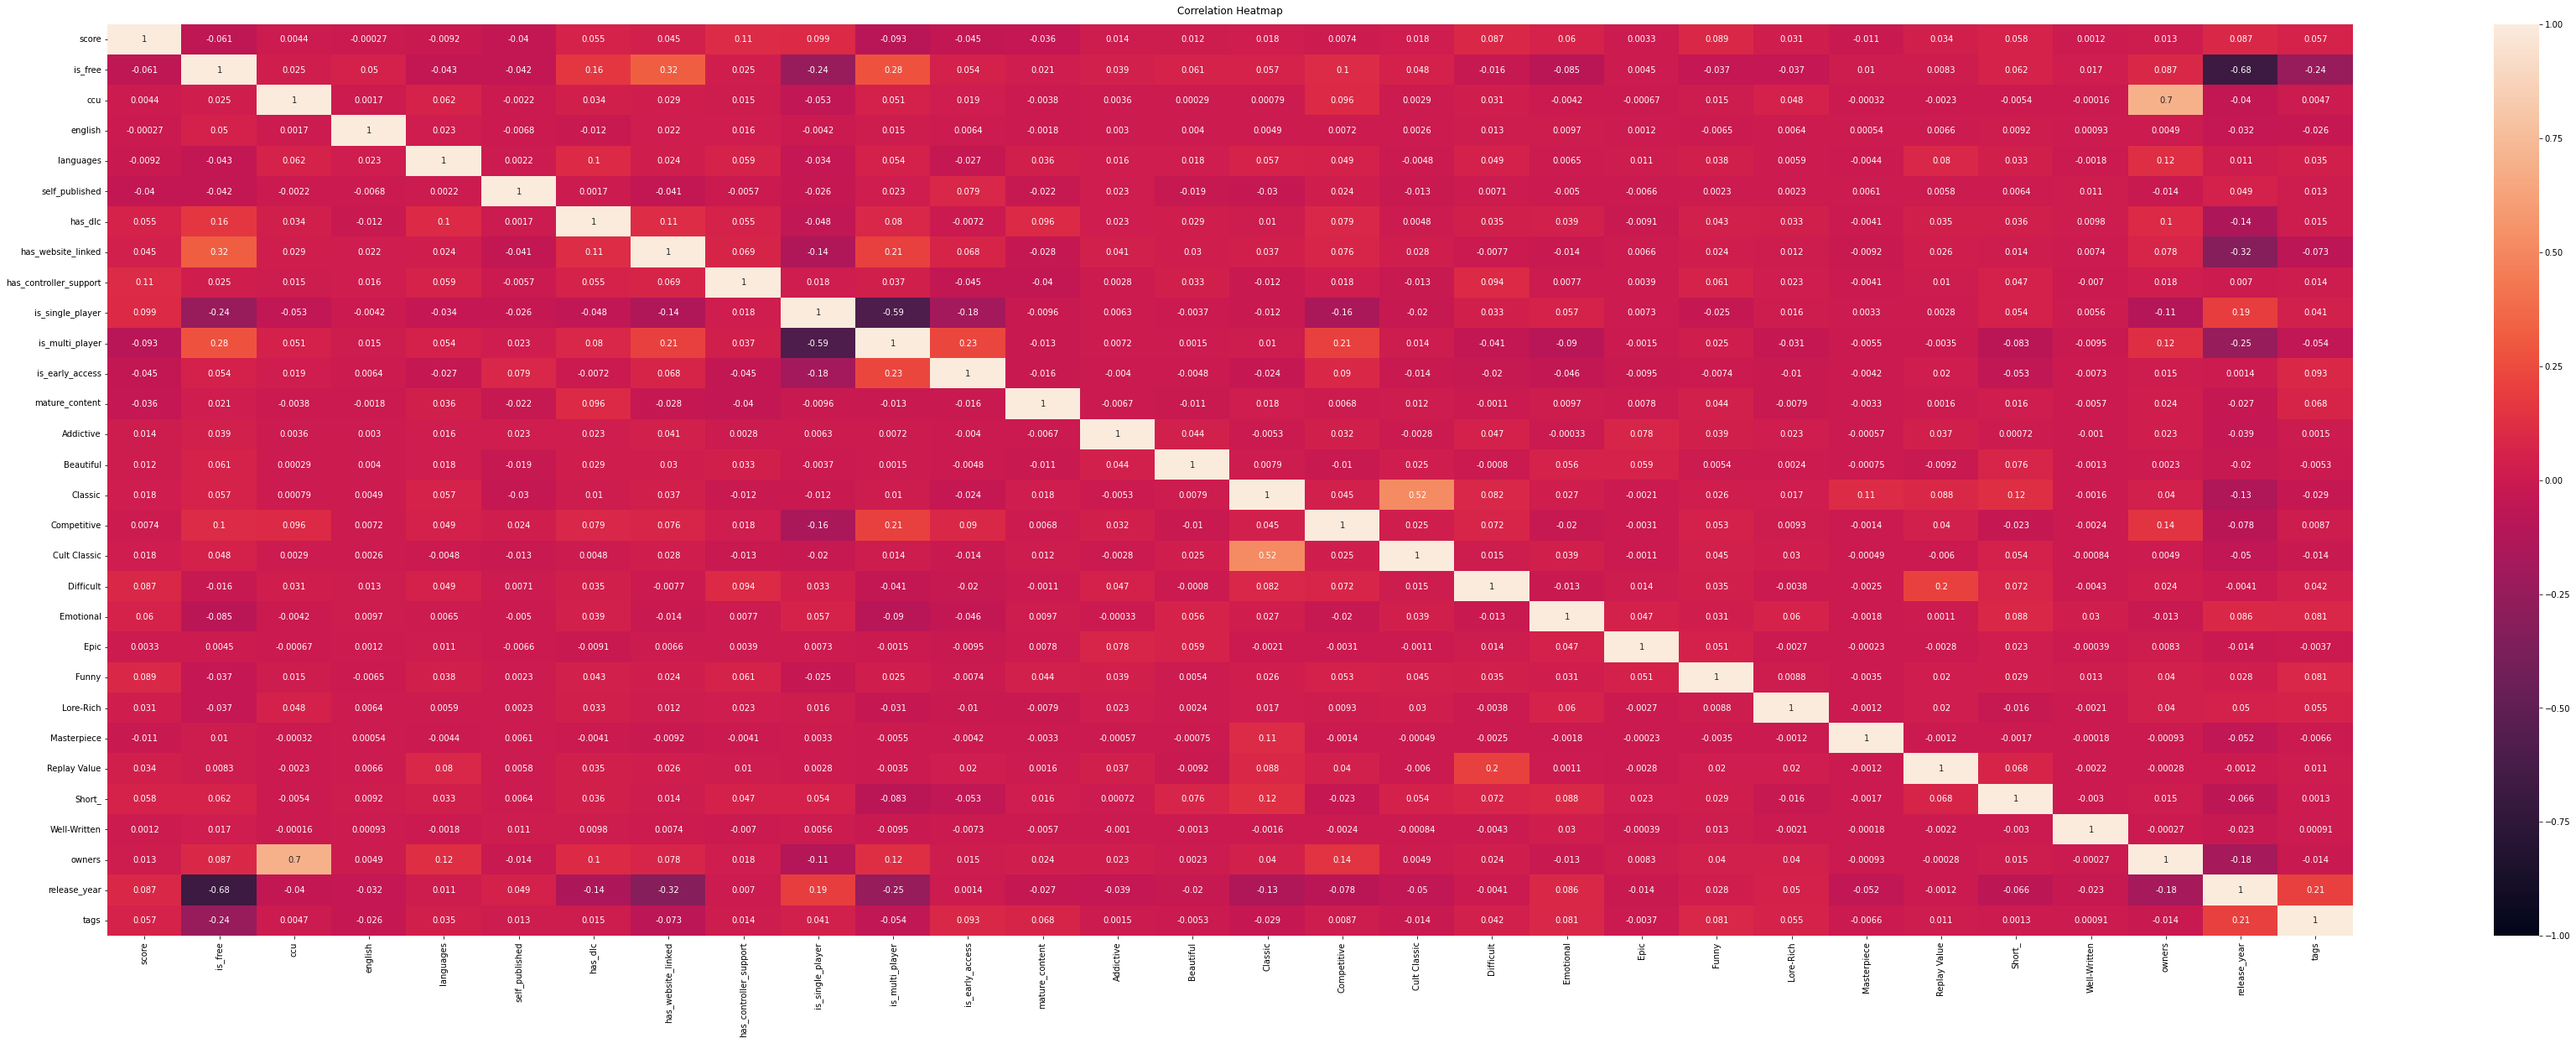

In [ ]:
plt.figure(figsize=(60, 20))
heatmap = sb.heatmap(train_data_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### **Dodatočná editácia:**

In [ ]:
train_data_df = train_data_df[['score', 'is_free', 'ccu', 'languages', 'self_published', 'is_single_player', 'is_multi_player', 'release_year', 'owners']]

In [ ]:
train_data_df

,score,is_free,ccu,languages,self_published,is_single_player,is_multi_player,release_year,owners
0,0.877490,1,31,9.0,1,1,0,2005,35000000.0
1,0.936969,1,71402,26.0,1,0,1,2007,75000000.0
2,0.947745,1,64,1.0,1,1,1,2010,3500000.0
3,0.198630,1,0,1.0,0,1,0,2007,75000.0
4,0.884615,1,0,1.0,1,1,0,2006,35000.0
...,...,...,...,...,...,...,...,...,...
9851,1.000000,0,0,1.0,1,1,0,2022,75000.0
9852,0.931034,0,28,1.0,0,1,0,2022,10000.0
9853,1.000000,0,0,1.0,0,1,0,2022,10000.0
9854,0.818182,0,0,29.0,1,1,0,2022,10000.0


#### **Extrakcia označení vzoriek:**

In [ ]:
train_target_df = train_data_df[['is_free']]
train_data_df = train_data_df.drop('is_free', axis=1)

In [ ]:
train_target_df

,is_free
0,1
1,1
2,1
3,1
4,1
...,...
9851,0
9852,0
9853,0
9854,0


#### **Normalizácia dát:**

In [ ]:
train_data_np = train_data_df.values
min_max_scaler = preprocessing.MinMaxScaler()
train_data_np_scaled = min_max_scaler.fit_transform(train_data_np)
train_data_df = pd.DataFrame(train_data_np_scaled)

In [ ]:
train_data_df

,0,1,2,3,4,5,6,7
0,0.877490,0.000081,0.285714,1.0,1.0,0.0,0.260870,0.466596
1,0.936969,0.186510,0.892857,1.0,0.0,1.0,0.347826,1.000000
2,0.947745,0.000167,0.000000,1.0,1.0,1.0,0.478261,0.046540
3,0.198630,0.000000,0.000000,0.0,1.0,0.0,0.347826,0.000867
4,0.884615,0.000000,0.000000,1.0,1.0,0.0,0.304348,0.000333
...,...,...,...,...,...,...,...,...
9851,1.000000,0.000000,0.000000,1.0,1.0,0.0,1.000000,0.000867
9852,0.931034,0.000073,0.000000,0.0,1.0,0.0,1.000000,0.000000
9853,1.000000,0.000000,0.000000,0.0,1.0,0.0,1.000000,0.000000
9854,0.818182,0.000000,1.000000,1.0,1.0,0.0,1.000000,0.000000


---
### **Testovacie dáta:**

#### **Povodné dáta:**

In [ ]:
test_data_df    

,D_appid,D_name,positive,negative,score,D_reviews,D_owners,coming_soon,D_release_date,D_genre,VYMAZAT_price,is_free,ccu,english,languages,D_tags,D_developer,D_publisher,publisher_est,developer_est,self_published,has_dlc,has_website_linked,has_controller_support,is_single_player,is_multi_player,is_early_access,mature_content,Addictive,Beautiful,Classic,Competitive,Cult Classic,Difficult,Emotional,Epic,Funny,Lore-Rich,Masterpiece,Replay Value,Short,Well-Written
0,780120,Car Crash Couch Party,13,19,0.406250,Mixed,"20,000 .. 50,000",False,"31 Jan, 2018","Casual, Free to Play, Indie, Racing, Sports",0.0,True,0,True,1.0,"{'Free to Play': 23, 'Racing': 23, 'Indie': 21...",Fogbound,Fogbound,2.0,2.0,True,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1520690,Die Rangliste,1,0,1.000000,Positive,"0 .. 20,000",False,"15 Jun, 2021",Action,0.0,True,0,True,1.0,"{'Shooter': 45, ""Shoot 'Em Up"": 38, 'Twin Stic...",Shane Strunk,wilkins_micawber_games,1.0,1.0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,708420,Broken Ground,304,111,0.732530,Mostly Positive,"200,000 .. 500,000",False,"12 Apr, 2018","Action, Free to Play, Indie, Strategy",0.0,True,0,True,1.0,"{'Free to Play': 48, 'Strategy': 36, 'Action':...",Bad Viking,Bad Viking,1.0,2.0,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1369400,Croppy Boy,76,37,0.672566,Mixed,"20,000 .. 50,000",False,"28 Aug, 2020","Free to Play, Indie, Simulation",0.0,True,2,True,9.0,"{'Time Management': 54, 'Life Sim': 49, 'Tradi...",Mr Crops,Mr Crops,2.0,2.0,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,919190,Cube Full of Mines,1,0,1.000000,Positive,"0 .. 20,000",False,"12 Sep, 2018","Casual, Indie",0.0,True,0,True,1.0,"{'Casual': 31, 'Indie': 30, 'Puzzle': 11}",Perceptual Games LLC,Perceptual Games LLC,1.0,1.0,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,745630,The redemption of pancakes,2,1,0.666667,Mixed,"0 .. 20,000",False,"3 Aug, 2018","Casual, Simulation",99.0,False,0,False,1.0,"{'Casual': 21, 'Simulation': 21}",CheGu,CheGu,1.0,1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,1063220,ChessBase 15 Steam Edition,8,4,0.666667,Mixed,"0 .. 20,000",False,"15 Oct, 2019",Strategy,11999.0,False,0,True,8.0,"{'Strategy': 19, 'Chess': 5}",ChessBase GmbH,ChessBase GmbH,7.0,7.0,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,1611110,AMID THE LINES,4,3,0.571429,Mixed,"20,000 .. 50,000",False,"10 Jun, 2021","Action, Adventure, Indie",699.0,False,0,True,1.0,"{'Spectacle fighter': 476, 'Souls-like': 469, ...",IBRAHIM SAWFAN,IBRAHIM SAWFAN,1.0,1.0,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,1534850,Floor Plan 2,40,5,0.888889,Positive,"0 .. 20,000",False,"1 Apr, 2021","Adventure, Indie",2499.0,False,5,True,6.0,"{'Point & Click': 46, 'Puzzle': 43, 'Explorati...",Turbo Button,Turbo Button,3.0,4.0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


#### **Odstránenie a premenovaniestĺpcov:**

In [ ]:
test_data_df = test_data_df.drop('D_appid', axis=1)
test_data_df = test_data_df.drop('D_name', axis=1)
test_data_df = test_data_df.drop('VYMAZAT_price', axis=1)
test_data_df = test_data_df.drop('positive', axis=1)
test_data_df = test_data_df.drop('negative', axis=1)
test_data_df = test_data_df.drop('D_developer', axis=1)
test_data_df = test_data_df.drop('D_publisher', axis=1)
test_data_df = test_data_df.drop('coming_soon', axis=1)
test_data_df = test_data_df.drop('D_reviews', axis=1)
test_data_df = test_data_df.drop('D_genre', axis=1)
test_data_df = test_data_df.drop('publisher_est', axis=1)
test_data_df = test_data_df.drop('developer_est', axis=1)

test_data_df = test_data_df.rename({'Short': 'Short_'}, axis=1)

In [ ]:
for column in test_data_df:
  print(column + ' : ' + str(test_data_df[column].isna().sum()) + '/' +  str(test_data_df.shape[0]))

score : 0/1000
D_owners : 0/1000
D_release_date : 0/1000
is_free : 0/1000
ccu : 0/1000
english : 0/1000
languages : 0/1000
D_tags : 0/1000
self_published : 0/1000
has_dlc : 0/1000
has_website_linked : 0/1000
has_controller_support : 0/1000
is_single_player : 0/1000
is_multi_player : 0/1000
is_early_access : 0/1000
mature_content : 0/1000
Addictive : 0/1000
Beautiful : 0/1000
Classic : 0/1000
Competitive : 0/1000
Cult Classic : 0/1000
Difficult : 0/1000
Emotional : 0/1000
Epic : 0/1000
Funny : 0/1000
Lore-Rich : 0/1000
Masterpiece : 0/1000
Replay Value : 0/1000
Short_ : 0/1000
Well-Written : 0/1000


#### **Extrakcia počtu vlastníkov:**

In [ ]:
loc.setlocale(loc.LC_ALL, 'en_US.UTF-8' ) 

owners = []

for row in test_data_df['D_owners']:
  splitted_row = row.split(' .. ')
  avg_owners = (loc.atoi(splitted_row[0]) + loc.atoi(splitted_row[1]))/2 
  owners.append(avg_owners)

test_data_df['owners'] = owners

test_data_df = test_data_df.drop('D_owners', axis=1)

#### **Extrakcia roku z dátumu vydania:**

In [ ]:
release_year = []

for row in test_data_df['D_release_date']:
  splitted_row = row.split(', ')
  if (len(splitted_row) != 2):
    splitted_row = row.split(' ')
  release_year.append(int(splitted_row[1]))

test_data_df['release_year'] = release_year

test_data_df = test_data_df.drop('D_release_date', axis=1)

#### **Extrakcia tagov:**

In [ ]:
tmp_tags = []

for row in test_data_df['D_tags']:
  splitted_row = ast.literal_eval(row)
  if (type(splitted_row) is dict):
    tmp_tags.append(tags.get(max(splitted_row, key=splitted_row.get)))
  else:
    tmp_tags.append(0)

test_data_df['tags'] = tmp_tags
test_data_df = test_data_df.drop('D_tags', axis=1)

#### **Nahradenie True a False numerickými hodnotami 0 a 1:**

In [ ]:
test_data_df = test_data_df.replace(True, 1)
test_data_df = test_data_df.replace(False, 0)

#### **Dodatočná editácia:**

In [ ]:
test_data_df = test_data_df[['score', 'is_free', 'ccu', 'languages', 'self_published', 'is_single_player', 'is_multi_player', 'release_year', 'owners']]

---
### **Validačné dáta:**

#### **Extrakcia validačných dát z testovacích dát:**

In [ ]:
print('is_free' + ' : ' + str(len(test_data_df[test_data_df['is_free'] == 1])) + '/' +  str(test_data_df.shape[0]))

is_free : 500/1000


In [ ]:
test_data_df0 = test_data_df.iloc[:250, :]
test_data_df1 = test_data_df.iloc[250:500, :]
test_data_df2 = test_data_df.iloc[500:750, :]
test_data_df3 = test_data_df.iloc[750:, :]

In [ ]:
test_data_df = test_data_df0.append(test_data_df2, ignore_index=True)
val_data_df = test_data_df1.append(test_data_df3, ignore_index=True)

test_data_df = test_data_df.reset_index(drop=True)
val_data_df = val_data_df.reset_index(drop=True)

#### **Extrakcia označení vzoriek:**

In [ ]:
test_target_df = test_data_df[['is_free']]
test_data_df = test_data_df.drop('is_free', axis=1)

test_target_df

,is_free
0,1
1,1
2,1
3,1
4,1
...,...
495,0
496,0
497,0
498,0


In [ ]:
val_target_df = val_data_df[['is_free']]
val_data_df = val_data_df.drop('is_free', axis=1)

val_target_df

,is_free
0,1
1,1
2,1
3,1
4,1
...,...
495,0
496,0
497,0
498,0


In [ ]:
test_data_df

,score,ccu,languages,self_published,is_single_player,is_multi_player,release_year,owners
0,0.406250,0,1.0,1,0,1,2018,35000.0
1,1.000000,0,1.0,0,1,0,2021,10000.0
2,0.732530,0,1.0,1,0,1,2018,350000.0
3,0.672566,2,9.0,1,1,1,2020,35000.0
4,1.000000,0,1.0,1,1,0,2018,10000.0
...,...,...,...,...,...,...,...,...
495,0.807692,0,1.0,1,1,1,2019,10000.0
496,1.000000,0,1.0,1,1,0,2021,35000.0
497,1.000000,0,2.0,1,1,0,2019,10000.0
498,1.000000,0,1.0,1,1,0,2020,10000.0


In [ ]:
val_data_df

,score,ccu,languages,self_published,is_single_player,is_multi_player,release_year,owners
0,0.400000,0,1.0,1,1,1,2019,10000.0
1,1.000000,0,1.0,0,1,0,2020,10000.0
2,0.897196,0,2.0,1,1,0,2020,10000.0
3,0.888339,5,1.0,0,1,1,2017,150000.0
4,0.923754,1,4.0,1,1,0,2020,75000.0
...,...,...,...,...,...,...,...,...
495,0.666667,0,1.0,1,1,0,2018,10000.0
496,0.666667,0,8.0,1,1,1,2019,10000.0
497,0.571429,0,1.0,1,1,0,2021,35000.0
498,0.888889,5,6.0,1,1,0,2021,10000.0


#### **Normalizácia dát:**

In [ ]:
test_data_np = test_data_df.values
min_max_scaler = preprocessing.MinMaxScaler()
test_data_np_scaled = min_max_scaler.fit_transform(test_data_np)
test_data_df = pd.DataFrame(test_data_np_scaled)

In [ ]:
test_data_df

,0,1,2,3,4,5,6,7
0,0.406250,0.000000,0.000000,1.0,0.0,1.0,0.809524,0.003338
1,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.952381,0.000000
2,0.732530,0.000000,0.000000,1.0,0.0,1.0,0.809524,0.045394
3,0.672566,0.000483,0.285714,1.0,1.0,1.0,0.904762,0.003338
4,1.000000,0.000000,0.000000,1.0,1.0,0.0,0.809524,0.000000
...,...,...,...,...,...,...,...,...
495,0.807692,0.000000,0.000000,1.0,1.0,1.0,0.857143,0.000000
496,1.000000,0.000000,0.000000,1.0,1.0,0.0,0.952381,0.003338
497,1.000000,0.000000,0.035714,1.0,1.0,0.0,0.857143,0.000000
498,1.000000,0.000000,0.000000,1.0,1.0,0.0,0.904762,0.000000


In [ ]:
val_data_np = val_data_df.values
min_max_scaler = preprocessing.MinMaxScaler()
val_data_np_scaled = min_max_scaler.fit_transform(val_data_np)
val_data_df = pd.DataFrame(val_data_np_scaled)

In [ ]:
val_data_df = val_data_df.fillna(0)

## **Neurónová sieť [288] (MLP-NN):**

In [ ]:
mlpnn_model = models.Sequential()
mlpnn_model.add(layers.Dense(288, input_shape=(8, ), activation='relu'))
mlpnn_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
mlpnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlpnn_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 288)               2592      
                                                                 
 dense_51 (Dense)            (None, 1)                 289       
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlpnn_model_history = mlpnn_model.fit(x=tf.convert_to_tensor(train_data_df),
                                      y=tf.convert_to_tensor(train_target_df), 
                                      batch_size=50, 
                                      validation_data=(tf.convert_to_tensor(val_data_df), 
                                                       tf.convert_to_tensor(val_target_df)), 
                                      epochs=200,
                                      verbose=1)
print(mlpnn_model_history.history)

Epoch 1/200
198/198 [==============================] - 1s 3ms/step - loss: 0.6986 - accuracy: 0.4663 - val_loss: 0.6961 - val_accuracy: 0.4600
Epoch 2/200
198/198 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4677 - val_loss: 0.6959 - val_accuracy: 0.4620
Epoch 3/200
198/198 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.4689 - val_loss: 0.6957 - val_accuracy: 0.4680
Epoch 4/200
198/198 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4708 - val_loss: 0.6954 - val_accuracy: 0.4720
Epoch 5/200
198/198 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.4724 - val_loss: 0.6952 - val_accuracy: 0.4740
Epoch 6/200
198/198 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4736 - val_loss: 0.6950 - val_accuracy: 0.4760
Epoch 7/200
198/198 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4747 - val_loss: 0.6948 - val_accuracy: 0.4740

In [ ]:
mlpnn_model.evaluate(tf.convert_to_tensor(test_data_df), 
                     tf.convert_to_tensor(test_target_df))

16/16 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5760


[0.6746478080749512, 0.5759999752044678]

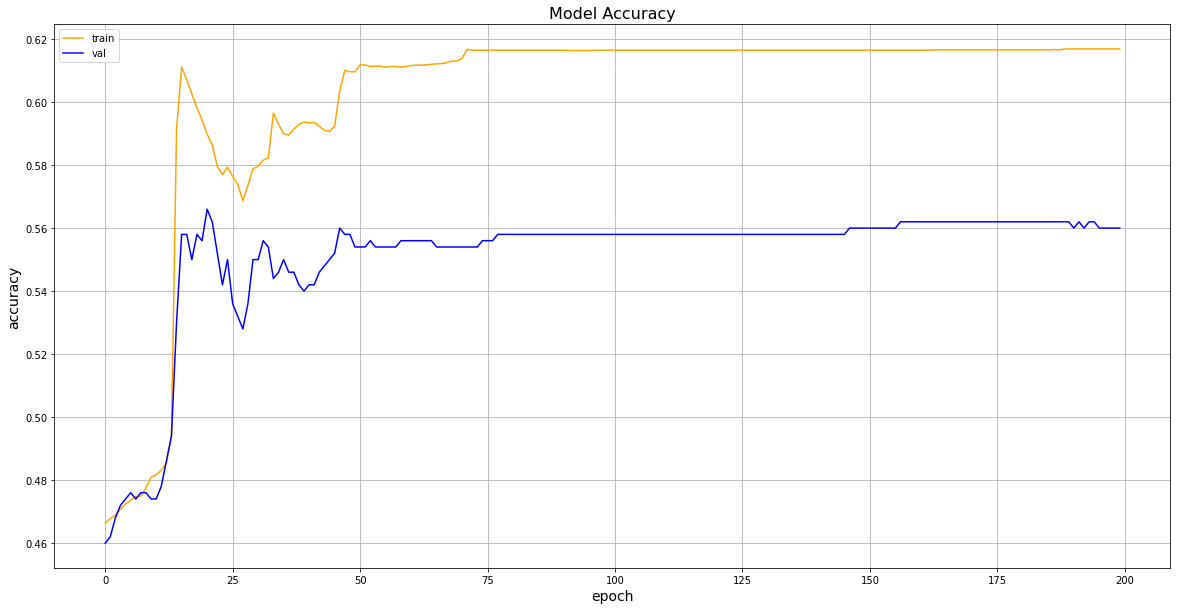

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['accuracy'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_accuracy'], color='blue',label='val')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

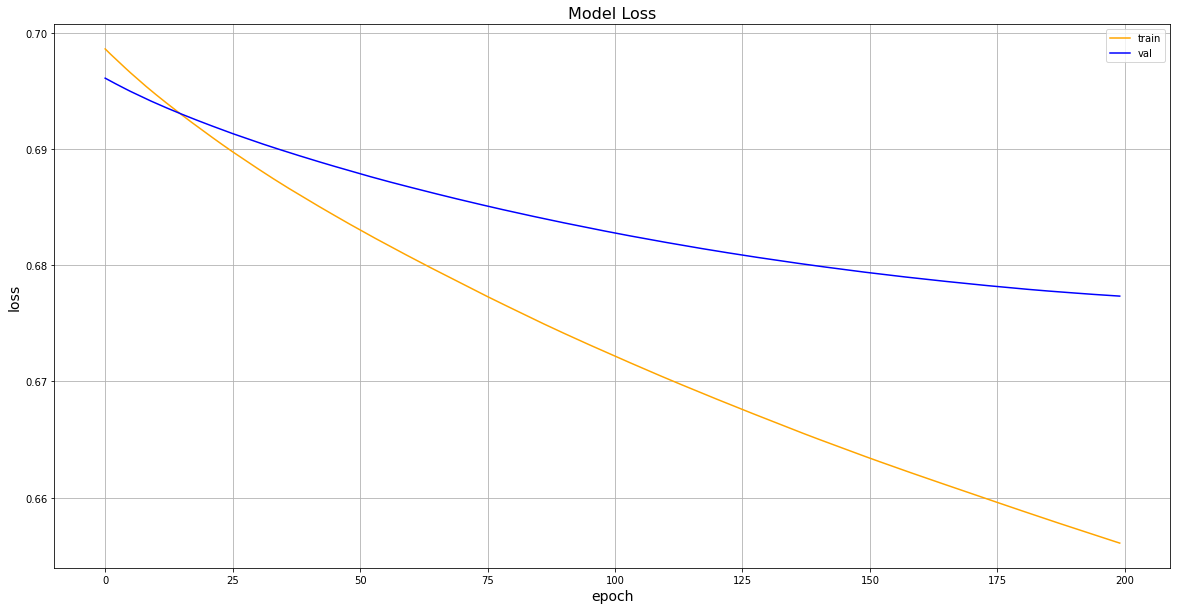

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['loss'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_loss'], color='blue',label='val')
plt.title('Model Loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

16/16 [==============================] - 0s 2ms/step


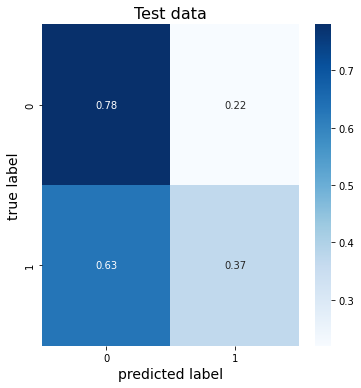

In [ ]:
test_pred = mlpnn_model.predict(tf.convert_to_tensor(test_data_df))
test_pred = np.where(test_pred > 0.5, 1, 0)
test_pred = np.concatenate(test_pred)

test_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(test_target_df), predictions=test_pred).numpy()
test_con_mat_norm = np.around(test_con_mat.astype('float') / test_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
test_con_mat_df = pd.DataFrame(test_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(test_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Test data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

308/308 [==============================] - 0s 1ms/step


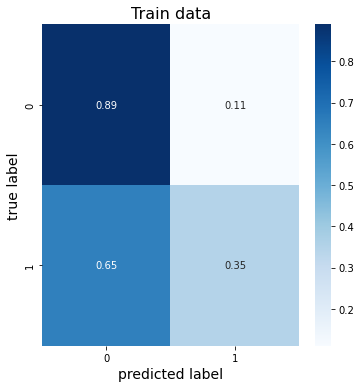

In [ ]:
train_pred = mlpnn_model.predict(tf.convert_to_tensor(train_data_df))
train_pred = np.where(train_pred > 0.5, 1, 0)
train_pred = np.concatenate(train_pred)

train_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(train_target_df), predictions=train_pred).numpy()
train_con_mat_norm = np.around(train_con_mat.astype('float') / train_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
train_con_mat_df = pd.DataFrame(train_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(train_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Train data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

#### **Dropout:**

In [ ]:
mlpnn_model = models.Sequential()
mlpnn_model.add(layers.Dense(288, input_shape=(8, ), activation='relu'))
mlpnn_model.add(layers.Dropout(0.5))
mlpnn_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
mlpnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlpnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 288)               2592      
                                                                 
 dropout (Dropout)           (None, 288)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 289       
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlpnn_model_history = mlpnn_model.fit(x=tf.convert_to_tensor(train_data_df),
                                      y=tf.convert_to_tensor(train_target_df), 
                                      batch_size=50, 
                                      validation_data=(tf.convert_to_tensor(val_data_df), 
                                                       tf.convert_to_tensor(val_target_df)), 
                                      epochs=200, 
                                      verbose=1)
print(mlpnn_model_history.history)

Epoch 1/200
198/198 [==============================] - 1s 4ms/step - loss: 0.7155 - accuracy: 0.4645 - val_loss: 0.7056 - val_accuracy: 0.4960
Epoch 2/200
198/198 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.4684 - val_loss: 0.7050 - val_accuracy: 0.4960
Epoch 3/200
198/198 [==============================] - 0s 2ms/step - loss: 0.7136 - accuracy: 0.4719 - val_loss: 0.7045 - val_accuracy: 0.4940
Epoch 4/200
198/198 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.4695 - val_loss: 0.7040 - val_accuracy: 0.4940
Epoch 5/200
198/198 [==============================] - 0s 2ms/step - loss: 0.7129 - accuracy: 0.4692 - val_loss: 0.7036 - val_accuracy: 0.4940
Epoch 6/200
198/198 [==============================] - 0s 2ms/step - loss: 0.7122 - accuracy: 0.4749 - val_loss: 0.7031 - val_accuracy: 0.4940
Epoch 7/200
198/198 [==============================] - 0s 2ms/step - loss: 0.7121 - accuracy: 0.4712 - val_loss: 0.7027 - val_accuracy: 0.4940

In [ ]:
mlpnn_model.evaluate(tf.convert_to_tensor(test_data_df), 
                     tf.convert_to_tensor(test_target_df))

16/16 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5620


[0.674575924873352, 0.5619999766349792]

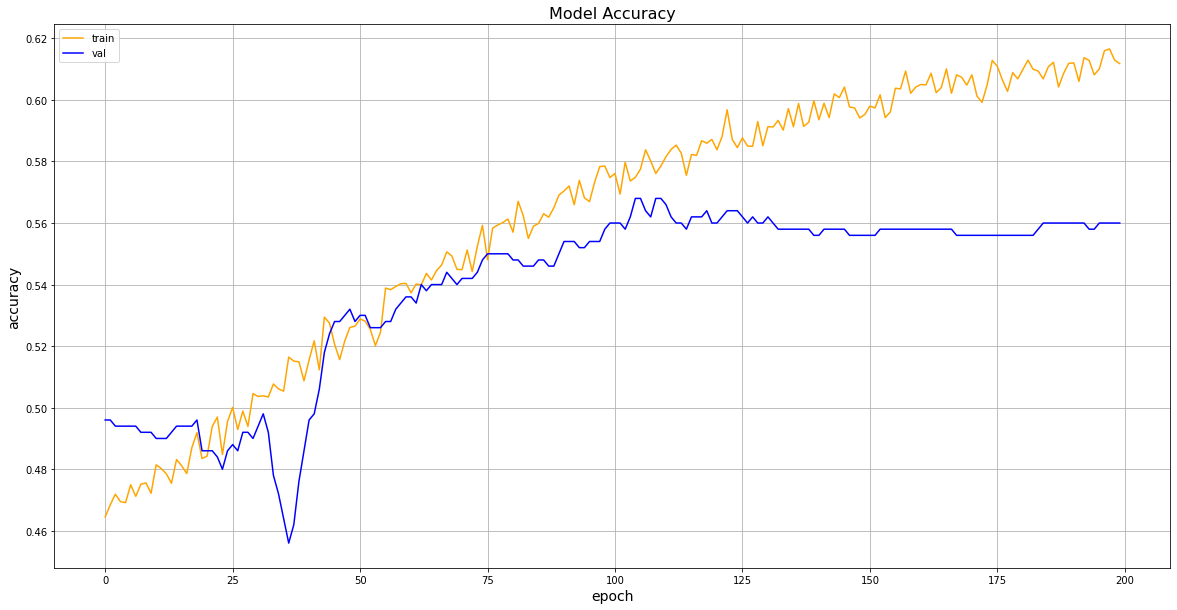

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['accuracy'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_accuracy'], color='blue',label='val')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

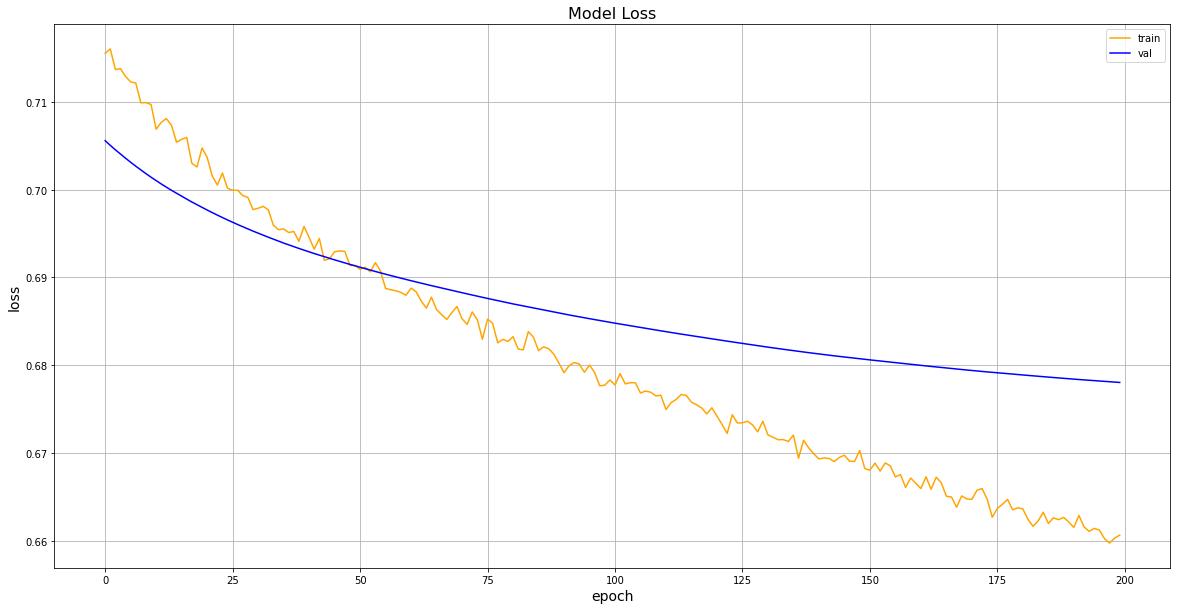

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['loss'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_loss'], color='blue',label='val')
plt.title('Model Loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

16/16 [==============================] - 0s 1ms/step


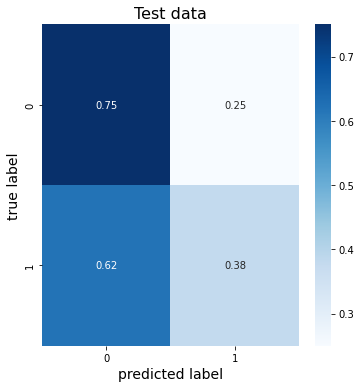

In [ ]:
test_pred = mlpnn_model.predict(tf.convert_to_tensor(test_data_df))
test_pred = np.where(test_pred > 0.5, 1, 0)
test_pred = np.concatenate(test_pred)

test_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(test_target_df), predictions=test_pred).numpy()
test_con_mat_norm = np.around(test_con_mat.astype('float') / test_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
test_con_mat_df = pd.DataFrame(test_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(test_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Test data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

308/308 [==============================] - 0s 1ms/step


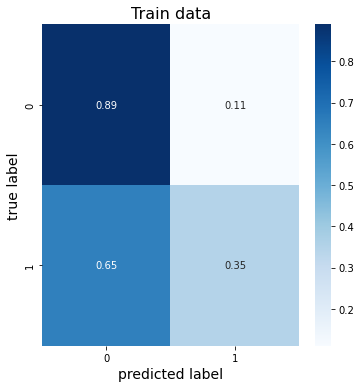

In [ ]:
train_pred = mlpnn_model.predict(tf.convert_to_tensor(train_data_df))
train_pred = np.where(train_pred > 0.5, 1, 0)
train_pred = np.concatenate(train_pred)

train_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(train_target_df), predictions=train_pred).numpy()
train_con_mat_norm = np.around(train_con_mat.astype('float') / train_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
train_con_mat_df = pd.DataFrame(train_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(train_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Train data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

#### **Early stopping:**

In [ ]:
mlpnn_model = models.Sequential()
mlpnn_model.add(layers.Dense(288, input_shape=(8, ), activation='relu'))
mlpnn_model.add(layers.Dropout(0.5))
mlpnn_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
mlpnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlpnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 288)               2592      
                                                                 
 dropout_1 (Dropout)         (None, 288)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                 289       
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlpnn_model_history = mlpnn_model.fit(x=tf.convert_to_tensor(train_data_df),
                                      y=tf.convert_to_tensor(train_target_df), 
                                      batch_size=50, 
                                      validation_data=(tf.convert_to_tensor(val_data_df), 
                                                       tf.convert_to_tensor(val_target_df)), 
                                      epochs=1000, 
                                      verbose=1,
                                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)])
print(mlpnn_model_history.history)

Epoch 1/1000
198/198 [==============================] - 2s 5ms/step - loss: 0.6891 - accuracy: 0.5415 - val_loss: 0.6881 - val_accuracy: 0.5640
Epoch 2/1000
198/198 [==============================] - 1s 3ms/step - loss: 0.6883 - accuracy: 0.5377 - val_loss: 0.6880 - val_accuracy: 0.5640
Epoch 3/1000
198/198 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5421 - val_loss: 0.6878 - val_accuracy: 0.5640
Epoch 4/1000
198/198 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5439 - val_loss: 0.6876 - val_accuracy: 0.5640
Epoch 5/1000
198/198 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5422 - val_loss: 0.6875 - val_accuracy: 0.5640
Epoch 6/1000
198/198 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5444 - val_loss: 0.6873 - val_accuracy: 0.5640
Epoch 7/1000
198/198 [==============================] - 1s 3ms/step - loss: 0.6884 - accuracy: 0.5463 - val_loss: 0.6871 - val_accuracy:

In [ ]:
mlpnn_model.evaluate(tf.convert_to_tensor(test_data_df), 
                     tf.convert_to_tensor(test_target_df))

16/16 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.5760


[0.6733229756355286, 0.5759999752044678]

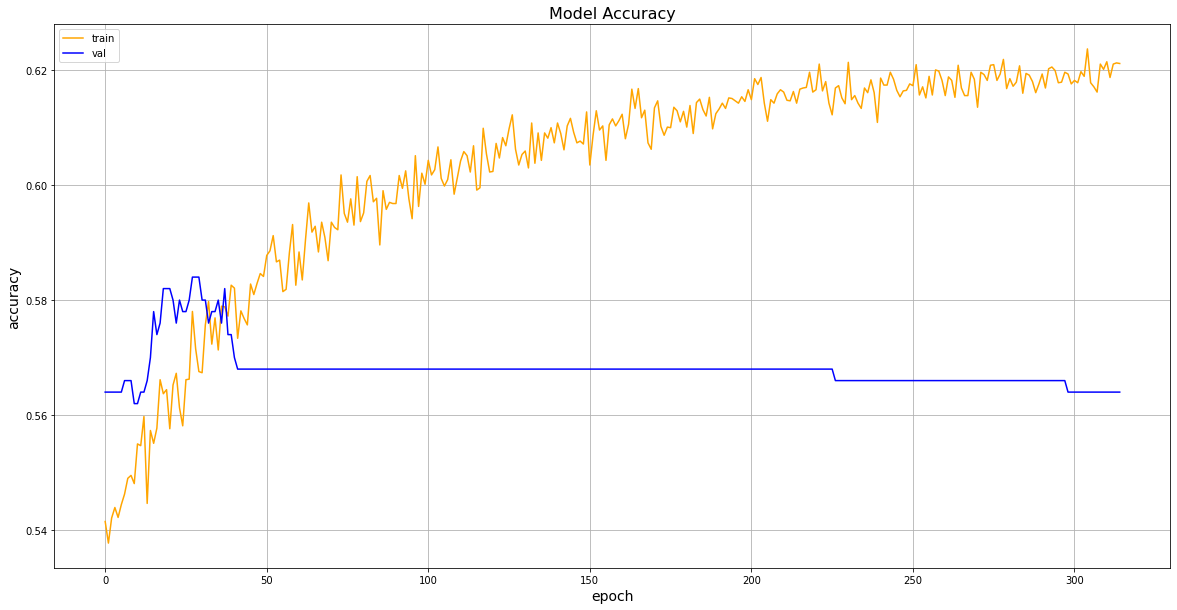

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['accuracy'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_accuracy'], color='blue',label='val')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

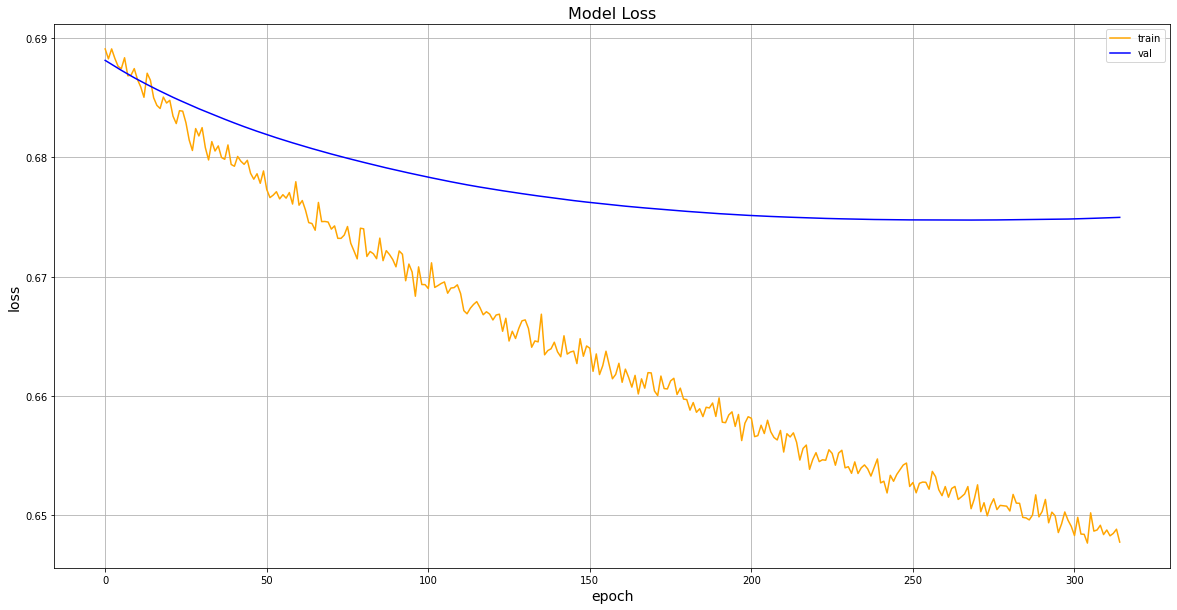

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['loss'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_loss'], color='blue',label='val')
plt.title('Model Loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

16/16 [==============================] - 0s 2ms/step


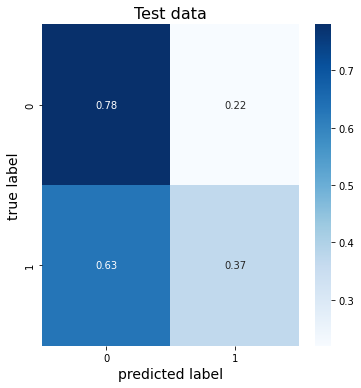

In [ ]:
test_pred = mlpnn_model.predict(tf.convert_to_tensor(test_data_df))
test_pred = np.where(test_pred > 0.5, 1, 0)
test_pred = np.concatenate(test_pred)

test_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(test_target_df), predictions=test_pred).numpy()
test_con_mat_norm = np.around(test_con_mat.astype('float') / test_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
test_con_mat_df = pd.DataFrame(test_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(test_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Test data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

308/308 [==============================] - 0s 1ms/step


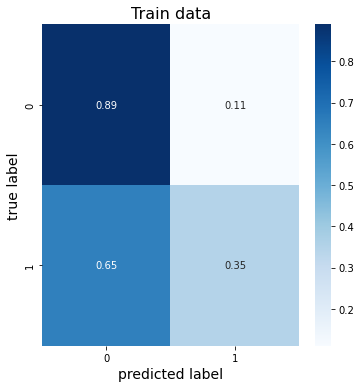

In [ ]:
train_pred = mlpnn_model.predict(tf.convert_to_tensor(train_data_df))
train_pred = np.where(train_pred > 0.5, 1, 0)
train_pred = np.concatenate(train_pred)

train_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(train_target_df), predictions=train_pred).numpy()
train_con_mat_norm = np.around(train_con_mat.astype('float') / train_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
train_con_mat_df = pd.DataFrame(train_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(train_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Train data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

## **Neurónová sieť [288-144-72] (MLP-NN):**

In [ ]:
mlpnn_model = models.Sequential()
mlpnn_model.add(layers.Dense(288, input_shape=(8, ), activation='relu'))
mlpnn_model.add(layers.Dense(144, activation='relu'))
mlpnn_model.add(layers.Dense(72, activation='relu'))
mlpnn_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
mlpnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlpnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 288)               2592      
                                                                 
 dense_21 (Dense)            (None, 144)               41616     
                                                                 
 dense_22 (Dense)            (None, 72)                10440     
                                                                 
 dense_23 (Dense)            (None, 1)                 73        
                                                                 
Total params: 54,721
Trainable params: 54,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlpnn_model_history = mlpnn_model.fit(x=tf.convert_to_tensor(train_data_df),
                                      y=tf.convert_to_tensor(train_target_df), 
                                      batch_size=50, 
                                      validation_data=(tf.convert_to_tensor(val_data_df), 
                                                       tf.convert_to_tensor(val_target_df)),
                                      epochs=200, 
                                      verbose=1)
print(mlpnn_model_history.history)

Epoch 1/200
198/198 [==============================] - 1s 4ms/step - loss: 0.6961 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/200
198/198 [==============================] - 1s 4ms/step - loss: 0.6942 - accuracy: 0.5000 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/200
198/198 [==============================] - 1s 3ms/step - loss: 0.6926 - accuracy: 0.4999 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 4/200
198/198 [==============================] - 1s 3ms/step - loss: 0.6912 - accuracy: 0.4996 - val_loss: 0.6909 - val_accuracy: 0.5020
Epoch 5/200
198/198 [==============================] - 1s 3ms/step - loss: 0.6900 - accuracy: 0.5001 - val_loss: 0.6902 - val_accuracy: 0.5100
Epoch 6/200
198/198 [==============================] - 1s 3ms/step - loss: 0.6888 - accuracy: 0.4956 - val_loss: 0.6896 - val_accuracy: 0.5180
Epoch 7/200
198/198 [==============================] - 1s 3ms/step - loss: 0.6877 - accuracy: 0.5223 - val_loss: 0.6890 - val_accuracy: 0.5520

In [ ]:
mlpnn_model.evaluate(tf.convert_to_tensor(test_data_df), 
                     tf.convert_to_tensor(test_target_df))

16/16 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5320


[0.6903918385505676, 0.5320000052452087]

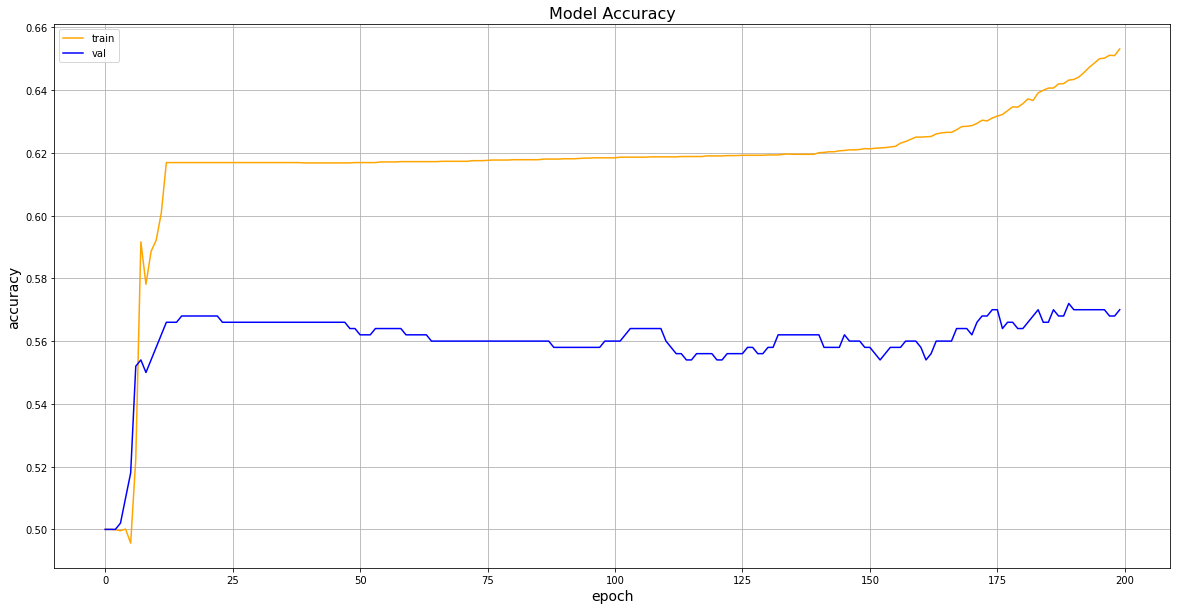

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['accuracy'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_accuracy'], color='blue',label='val')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

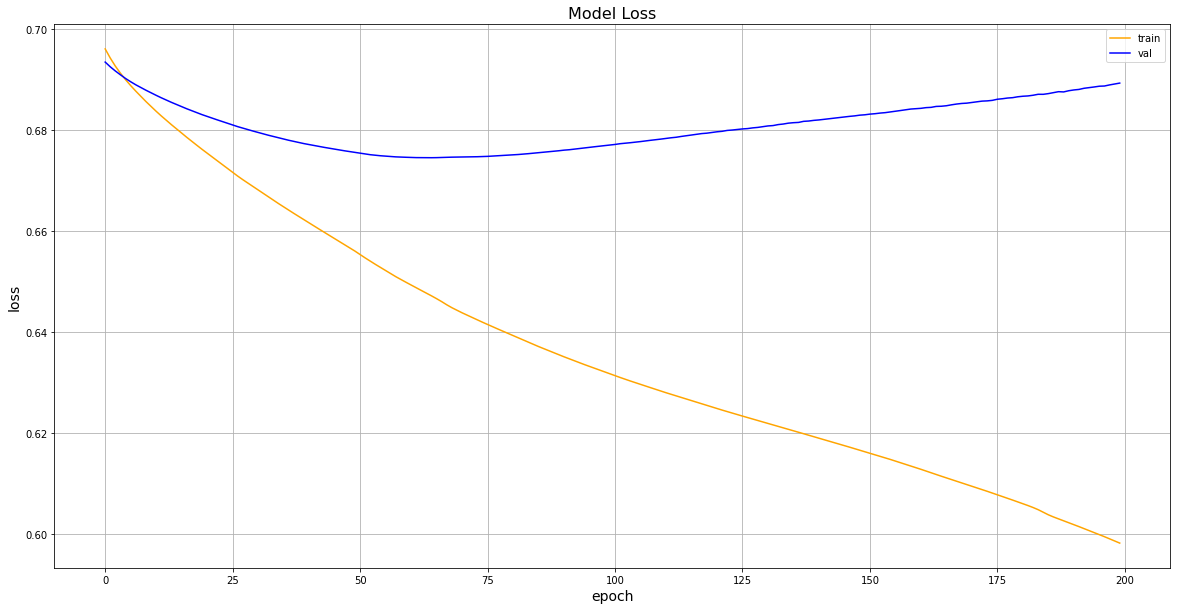

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['loss'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_loss'], color='blue',label='val')
plt.title('Model Loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

16/16 [==============================] - 0s 2ms/step


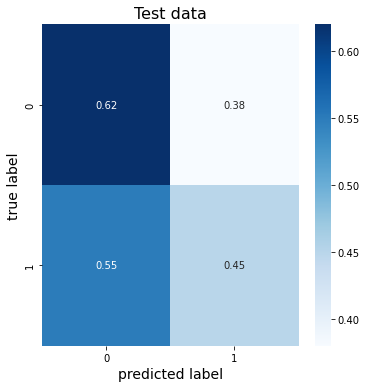

In [ ]:
test_pred = mlpnn_model.predict(tf.convert_to_tensor(test_data_df))
test_pred = np.where(test_pred > 0.5, 1, 0)
test_pred = np.concatenate(test_pred)

test_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(test_target_df), predictions=test_pred).numpy()
test_con_mat_norm = np.around(test_con_mat.astype('float') / test_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
test_con_mat_df = pd.DataFrame(test_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(test_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Test data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

308/308 [==============================] - 0s 1ms/step


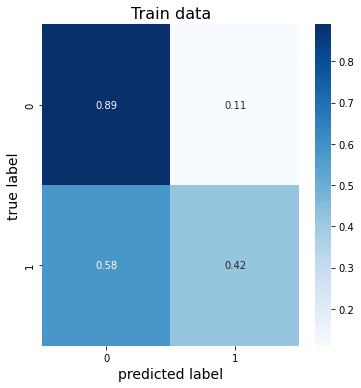

In [ ]:
train_pred = mlpnn_model.predict(tf.convert_to_tensor(train_data_df))
train_pred = np.where(train_pred > 0.5, 1, 0)
train_pred = np.concatenate(train_pred)

train_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(train_target_df), predictions=train_pred).numpy()
train_con_mat_norm = np.around(train_con_mat.astype('float') / train_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
train_con_mat_df = pd.DataFrame(train_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(train_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Train data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

#### **Dropout:**

In [ ]:
mlpnn_model = models.Sequential()
mlpnn_model.add(layers.Dense(288, input_shape=(8, ), activation='relu'))
mlpnn_model.add(layers.Dense(144, activation='relu'))
mlpnn_model.add(layers.Dense(72, activation='relu'))
mlpnn_model.add(layers.Dropout(0.5))
mlpnn_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
mlpnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlpnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 288)               2592      
                                                                 
 dense_25 (Dense)            (None, 144)               41616     
                                                                 
 dense_26 (Dense)            (None, 72)                10440     
                                                                 
 dropout_2 (Dropout)         (None, 72)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                 73        
                                                                 
Total params: 54,721
Trainable params: 54,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlpnn_model_history = mlpnn_model.fit(x=tf.convert_to_tensor(train_data_df),
                                      y=tf.convert_to_tensor(train_target_df), 
                                      batch_size=50, 
                                      validation_data=(tf.convert_to_tensor(val_data_df), 
                                                       tf.convert_to_tensor(val_target_df)), 
                                      epochs=200, 
                                      verbose=1)
print(mlpnn_model_history.history)

Epoch 1/200
198/198 [==============================] - 2s 4ms/step - loss: 0.6955 - accuracy: 0.4819 - val_loss: 0.6928 - val_accuracy: 0.5160
Epoch 2/200
198/198 [==============================] - 1s 3ms/step - loss: 0.6953 - accuracy: 0.4789 - val_loss: 0.6924 - val_accuracy: 0.5100
Epoch 3/200
198/198 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.5057 - val_loss: 0.6922 - val_accuracy: 0.5120
Epoch 4/200
198/198 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.5026 - val_loss: 0.6919 - val_accuracy: 0.5200
Epoch 5/200
198/198 [==============================] - 1s 3ms/step - loss: 0.6924 - accuracy: 0.5123 - val_loss: 0.6917 - val_accuracy: 0.5740
Epoch 6/200
198/198 [==============================] - 1s 3ms/step - loss: 0.6916 - accuracy: 0.5221 - val_loss: 0.6914 - val_accuracy: 0.5680
Epoch 7/200
198/198 [==============================] - 1s 4ms/step - loss: 0.6913 - accuracy: 0.5274 - val_loss: 0.6912 - val_accuracy: 0.5640

In [ ]:
mlpnn_model.evaluate(tf.convert_to_tensor(test_data_df), 
                     tf.convert_to_tensor(test_target_df))

16/16 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5360


[0.6828461289405823, 0.5360000133514404]

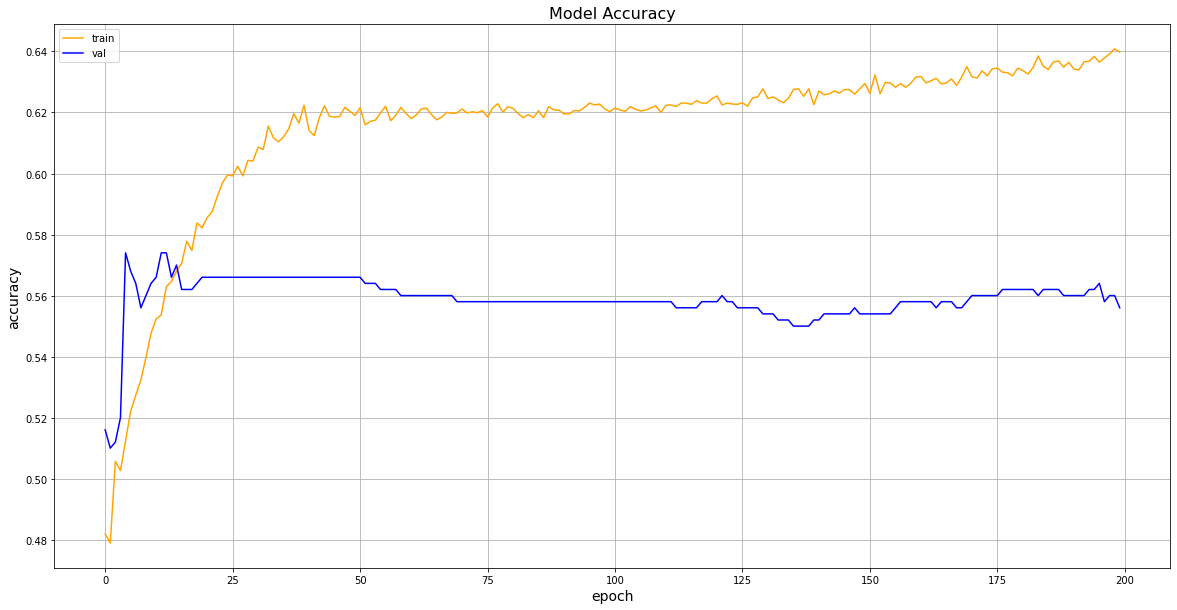

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['accuracy'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_accuracy'], color='blue',label='val')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

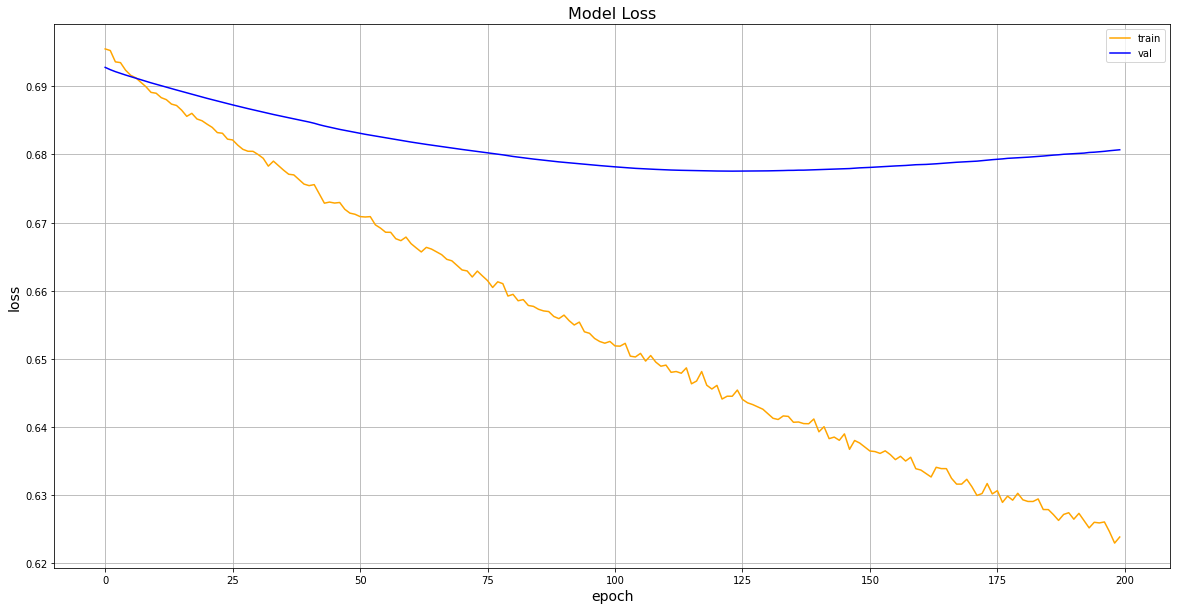

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['loss'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_loss'], color='blue',label='val')
plt.title('Model Loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

16/16 [==============================] - 0s 2ms/step


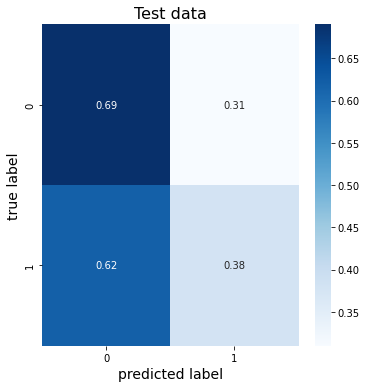

In [ ]:
test_pred = mlpnn_model.predict(tf.convert_to_tensor(test_data_df))
test_pred = np.where(test_pred > 0.5, 1, 0)
test_pred = np.concatenate(test_pred)

test_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(test_target_df), predictions=test_pred).numpy()
test_con_mat_norm = np.around(test_con_mat.astype('float') / test_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
test_con_mat_df = pd.DataFrame(test_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(test_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Test data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

308/308 [==============================] - 0s 1ms/step


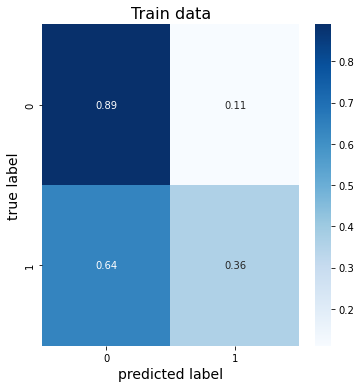

In [ ]:
train_pred = mlpnn_model.predict(tf.convert_to_tensor(train_data_df))
train_pred = np.where(train_pred > 0.5, 1, 0)
train_pred = np.concatenate(train_pred)

train_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(train_target_df), predictions=train_pred).numpy()
train_con_mat_norm = np.around(train_con_mat.astype('float') / train_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
train_con_mat_df = pd.DataFrame(train_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(train_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Train data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

#### **Early stopping:**

In [ ]:
mlpnn_model = models.Sequential()
mlpnn_model.add(layers.Dense(288, input_shape=(8, ), activation='relu'))
mlpnn_model.add(layers.Dense(144, activation='relu'))
mlpnn_model.add(layers.Dense(72, activation='relu'))
mlpnn_model.add(layers.Dropout(0.5))
mlpnn_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
mlpnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlpnn_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 288)               2592      
                                                                 
 dense_29 (Dense)            (None, 144)               41616     
                                                                 
 dense_30 (Dense)            (None, 72)                10440     
                                                                 
 dropout_3 (Dropout)         (None, 72)                0         
                                                                 
 dense_31 (Dense)            (None, 1)                 73        
                                                                 
Total params: 54,721
Trainable params: 54,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlpnn_model_history = mlpnn_model.fit(x=tf.convert_to_tensor(train_data_df),
                                      y=tf.convert_to_tensor(train_target_df), 
                                      batch_size=50, 
                                      validation_data=(tf.convert_to_tensor(val_data_df), 
                                                       tf.convert_to_tensor(val_target_df)), 
                                      epochs=1000, 
                                      verbose=1,
                                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)])
print(mlpnn_model_history.history)

Epoch 1/1000
198/198 [==============================] - 2s 5ms/step - loss: 0.6929 - accuracy: 0.5036 - val_loss: 0.6933 - val_accuracy: 0.5080
Epoch 2/1000
198/198 [==============================] - 1s 4ms/step - loss: 0.6915 - accuracy: 0.5212 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 3/1000
198/198 [==============================] - 1s 4ms/step - loss: 0.6920 - accuracy: 0.5144 - val_loss: 0.6927 - val_accuracy: 0.5180
Epoch 4/1000
198/198 [==============================] - 1s 4ms/step - loss: 0.6910 - accuracy: 0.5272 - val_loss: 0.6924 - val_accuracy: 0.5140
Epoch 5/1000
198/198 [==============================] - 1s 3ms/step - loss: 0.6900 - accuracy: 0.5312 - val_loss: 0.6921 - val_accuracy: 0.5240
Epoch 6/1000
198/198 [==============================] - 1s 3ms/step - loss: 0.6900 - accuracy: 0.5286 - val_loss: 0.6918 - val_accuracy: 0.5280
Epoch 7/1000
198/198 [==============================] - 1s 3ms/step - loss: 0.6888 - accuracy: 0.5360 - val_loss: 0.6915 - val_accuracy:

In [ ]:
mlpnn_model.evaluate(tf.convert_to_tensor(test_data_df), 
                     tf.convert_to_tensor(test_target_df))

16/16 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5680


[0.6782139539718628, 0.5680000185966492]

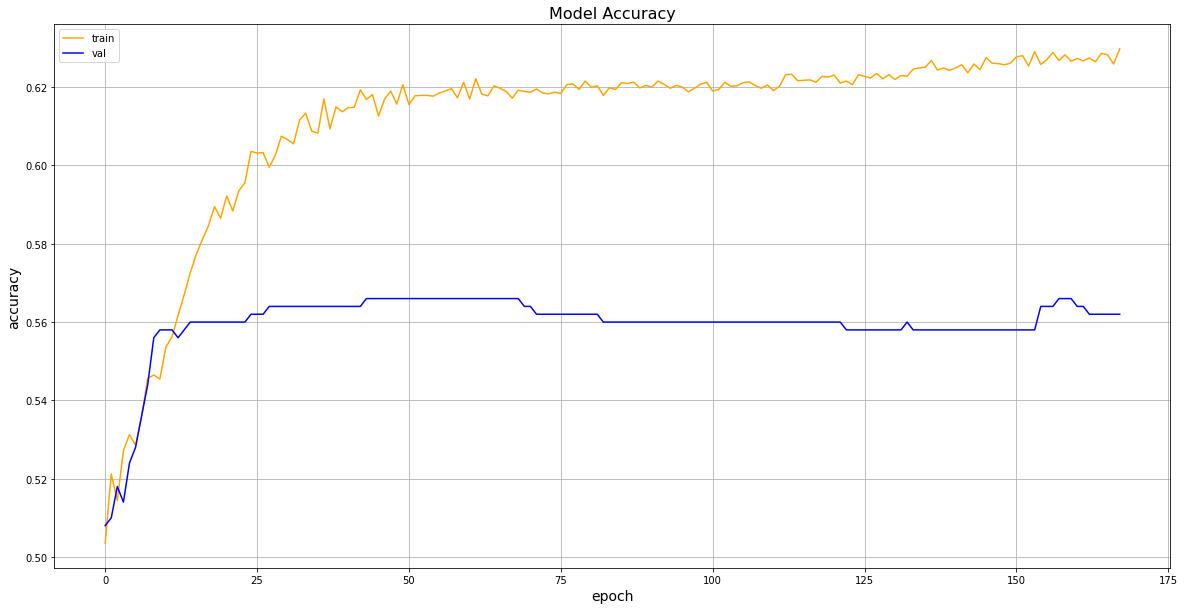

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['accuracy'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_accuracy'], color='blue',label='val')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

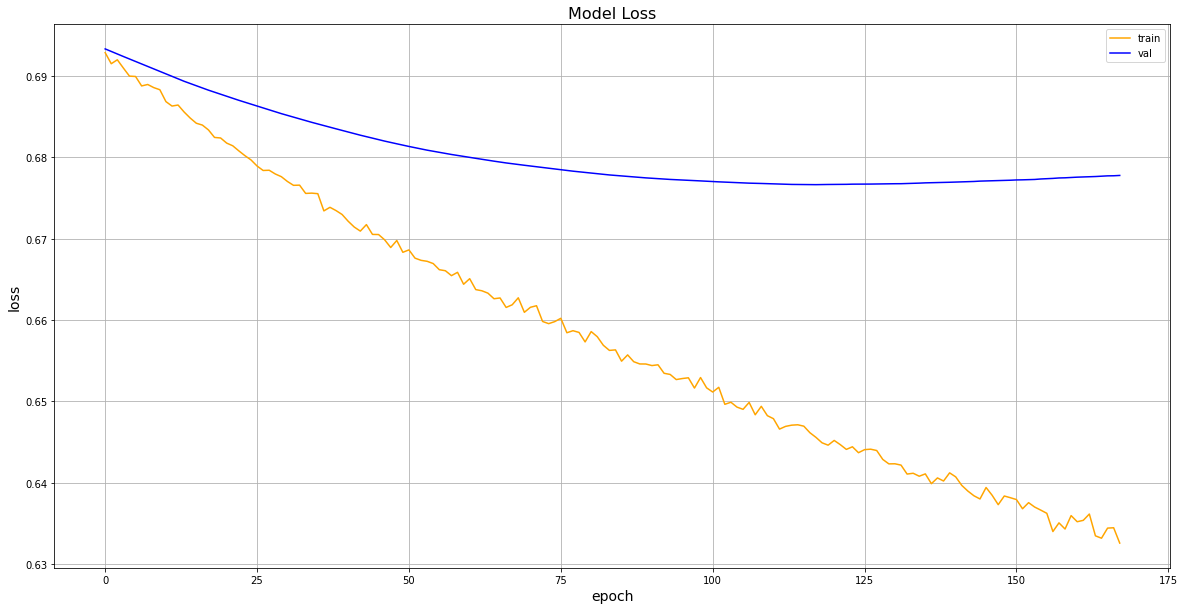

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['loss'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_loss'], color='blue',label='val')
plt.title('Model Loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

16/16 [==============================] - 0s 2ms/step


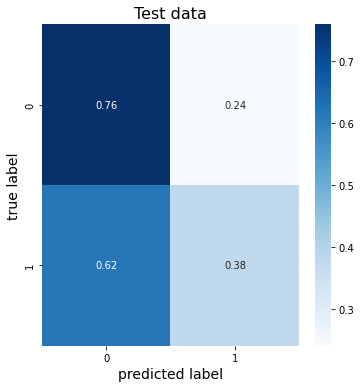

In [ ]:
test_pred = mlpnn_model.predict(tf.convert_to_tensor(test_data_df))
test_pred = np.where(test_pred > 0.5, 1, 0)
test_pred = np.concatenate(test_pred)

test_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(test_target_df), predictions=test_pred).numpy()
test_con_mat_norm = np.around(test_con_mat.astype('float') / test_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
test_con_mat_df = pd.DataFrame(test_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(test_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Test data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

308/308 [==============================] - 0s 2ms/step


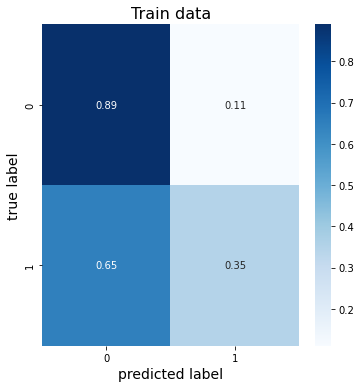

In [ ]:
train_pred = mlpnn_model.predict(tf.convert_to_tensor(train_data_df))
train_pred = np.where(train_pred > 0.5, 1, 0)
train_pred = np.concatenate(train_pred)

train_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(train_target_df), predictions=train_pred).numpy()
train_con_mat_norm = np.around(train_con_mat.astype('float') / train_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
train_con_mat_df = pd.DataFrame(train_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(train_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Train data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

## **Neurónová sieť [288-144-72-36-18] (MLP-NN):**

In [ ]:
mlpnn_model = models.Sequential()
mlpnn_model.add(layers.Dense(288, input_shape=(8, ), activation='relu'))
mlpnn_model.add(layers.Dense(144, activation='relu'))
mlpnn_model.add(layers.Dense(72, activation='relu'))
mlpnn_model.add(layers.Dense(36, activation='relu'))
mlpnn_model.add(layers.Dense(18, activation='relu'))
mlpnn_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
mlpnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlpnn_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 288)               2592      
                                                                 
 dense_33 (Dense)            (None, 144)               41616     
                                                                 
 dense_34 (Dense)            (None, 72)                10440     
                                                                 
 dense_35 (Dense)            (None, 36)                2628      
                                                                 
 dense_36 (Dense)            (None, 18)                666       
                                                                 
 dense_37 (Dense)            (None, 1)                 19        
                                                                 
Total params: 57,961
Trainable params: 57,961
Non-tra

In [ ]:
mlpnn_model_history = mlpnn_model.fit(x=tf.convert_to_tensor(train_data_df),
                                      y=tf.convert_to_tensor(train_target_df), 
                                      batch_size=50, 
                                      validation_data=(tf.convert_to_tensor(val_data_df), 
                                                       tf.convert_to_tensor(val_target_df)),
                                      epochs=200, 
                                      verbose=1)
print(mlpnn_model_history.history)

Epoch 1/200
198/198 [==============================] - 2s 7ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6933 - val_accuracy: 0.5200
Epoch 2/200
198/198 [==============================] - 1s 3ms/step - loss: 0.6924 - accuracy: 0.5657 - val_loss: 0.6930 - val_accuracy: 0.5320
Epoch 3/200
198/198 [==============================] - 1s 4ms/step - loss: 0.6917 - accuracy: 0.5712 - val_loss: 0.6926 - val_accuracy: 0.5340
Epoch 4/200
198/198 [==============================] - 1s 4ms/step - loss: 0.6911 - accuracy: 0.5741 - val_loss: 0.6923 - val_accuracy: 0.5340
Epoch 5/200
198/198 [==============================] - 1s 4ms/step - loss: 0.6905 - accuracy: 0.5801 - val_loss: 0.6919 - val_accuracy: 0.5380
Epoch 6/200
198/198 [==============================] - 1s 4ms/step - loss: 0.6899 - accuracy: 0.5825 - val_loss: 0.6916 - val_accuracy: 0.5380
Epoch 7/200
198/198 [==============================] - 1s 4ms/step - loss: 0.6893 - accuracy: 0.5890 - val_loss: 0.6913 - val_accuracy: 0.5440

In [ ]:
mlpnn_model.evaluate(tf.convert_to_tensor(test_data_df), 
                     tf.convert_to_tensor(test_target_df))

16/16 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5380


[0.6870489120483398, 0.5379999876022339]

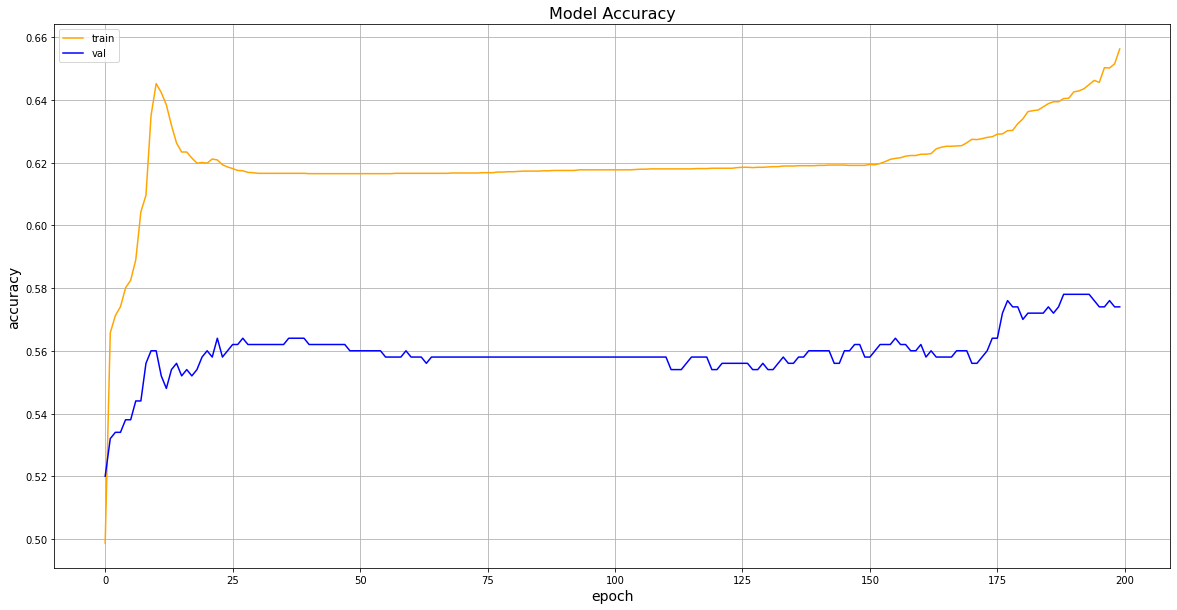

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['accuracy'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_accuracy'], color='blue',label='val')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

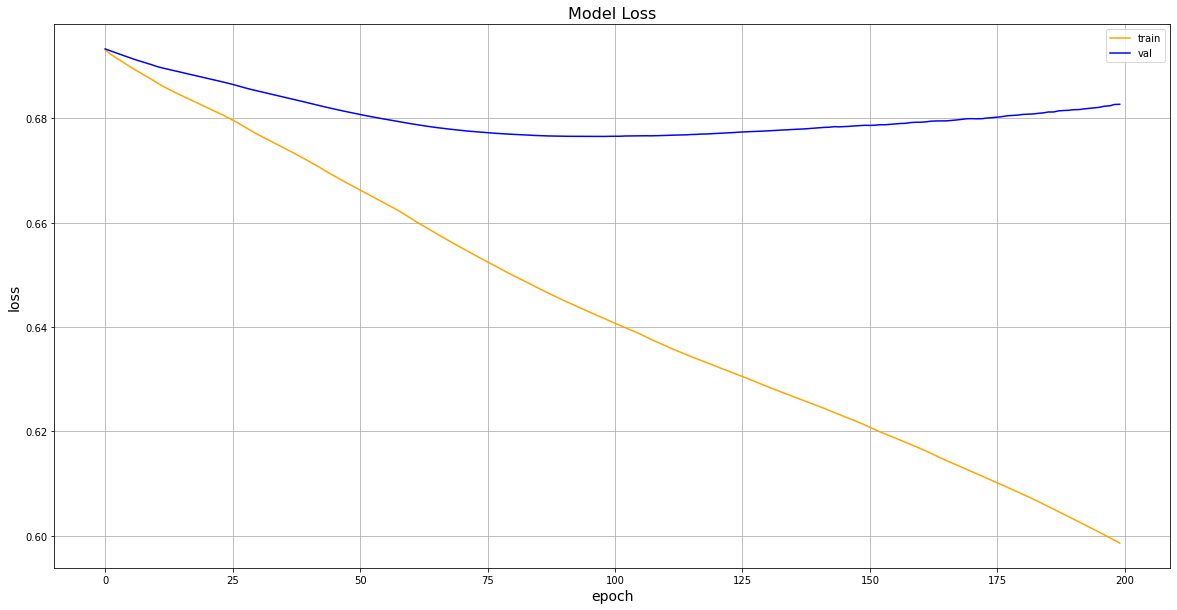

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['loss'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_loss'], color='blue',label='val')
plt.title('Model Loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

16/16 [==============================] - 0s 2ms/step


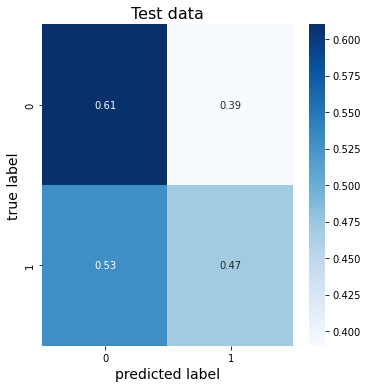

In [ ]:
test_pred = mlpnn_model.predict(tf.convert_to_tensor(test_data_df))
test_pred = np.where(test_pred > 0.5, 1, 0)
test_pred = np.concatenate(test_pred)

test_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(test_target_df), predictions=test_pred).numpy()
test_con_mat_norm = np.around(test_con_mat.astype('float') / test_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
test_con_mat_df = pd.DataFrame(test_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(test_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Test data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

308/308 [==============================] - 1s 2ms/step


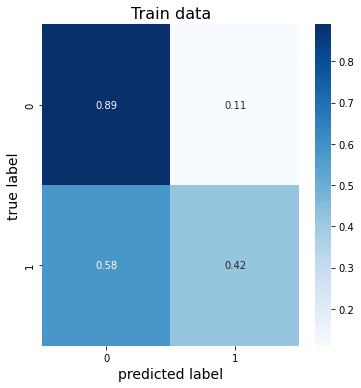

In [ ]:
train_pred = mlpnn_model.predict(tf.convert_to_tensor(train_data_df))
train_pred = np.where(train_pred > 0.5, 1, 0)
train_pred = np.concatenate(train_pred)

train_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(train_target_df), predictions=train_pred).numpy()
train_con_mat_norm = np.around(train_con_mat.astype('float') / train_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
train_con_mat_df = pd.DataFrame(train_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(train_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Train data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

#### **Dropout:**

In [ ]:
mlpnn_model = models.Sequential()
mlpnn_model.add(layers.Dense(288, input_shape=(8, ), activation='relu'))
mlpnn_model.add(layers.Dense(144, activation='relu'))
mlpnn_model.add(layers.Dense(72, activation='relu'))
mlpnn_model.add(layers.Dense(36, activation='relu'))
mlpnn_model.add(layers.Dense(18, activation='relu'))
mlpnn_model.add(layers.Dropout(0.5))
mlpnn_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
mlpnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlpnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 288)               2592      
                                                                 
 dense_39 (Dense)            (None, 144)               41616     
                                                                 
 dense_40 (Dense)            (None, 72)                10440     
                                                                 
 dense_41 (Dense)            (None, 36)                2628      
                                                                 
 dense_42 (Dense)            (None, 18)                666       
                                                                 
 dropout_4 (Dropout)         (None, 18)                0         
                                                                 
 dense_43 (Dense)            (None, 1)               

In [ ]:
mlpnn_model_history = mlpnn_model.fit(x=tf.convert_to_tensor(train_data_df),
                                      y=tf.convert_to_tensor(train_target_df), 
                                      batch_size=50, 
                                      validation_data=(tf.convert_to_tensor(val_data_df), 
                                                       tf.convert_to_tensor(val_target_df)), 
                                      epochs=200, 
                                      verbose=1)
print(mlpnn_model_history.history)

Epoch 1/200
198/198 [==============================] - 1s 4ms/step - loss: 0.6934 - accuracy: 0.4985 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/200
198/198 [==============================] - 1s 3ms/step - loss: 0.6926 - accuracy: 0.5010 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 3/200
198/198 [==============================] - 1s 4ms/step - loss: 0.6923 - accuracy: 0.4976 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 4/200
198/198 [==============================] - 1s 4ms/step - loss: 0.6918 - accuracy: 0.5025 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 5/200
198/198 [==============================] - 1s 3ms/step - loss: 0.6917 - accuracy: 0.5047 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 6/200
198/198 [==============================] - 1s 4ms/step - loss: 0.6910 - accuracy: 0.5084 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 7/200
198/198 [==============================] - 1s 4ms/step - loss: 0.6904 - accuracy: 0.5111 - val_loss: 0.6914 - val_accuracy: 0.5000

In [ ]:
mlpnn_model.evaluate(tf.convert_to_tensor(test_data_df), 
                     tf.convert_to_tensor(test_target_df))

16/16 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5420


[0.679376482963562, 0.5419999957084656]

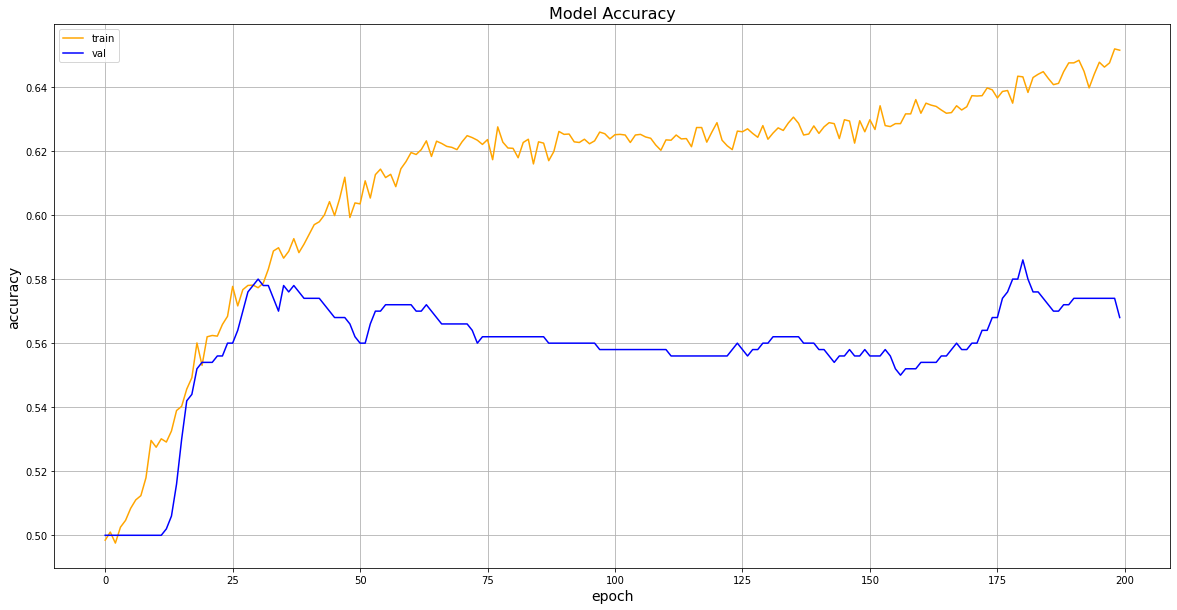

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['accuracy'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_accuracy'], color='blue',label='val')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

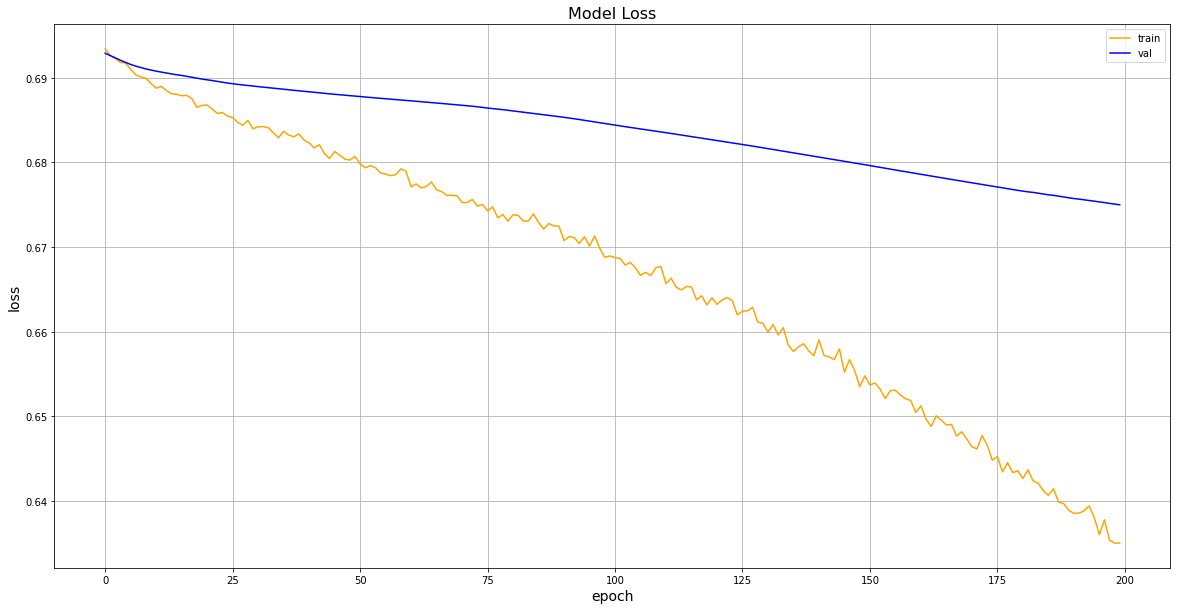

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['loss'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_loss'], color='blue',label='val')
plt.title('Model Loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

16/16 [==============================] - 0s 2ms/step


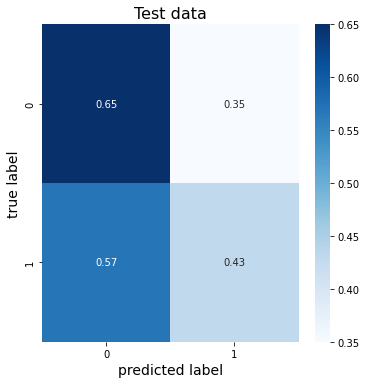

In [ ]:
test_pred = mlpnn_model.predict(tf.convert_to_tensor(test_data_df))
test_pred = np.where(test_pred > 0.5, 1, 0)
test_pred = np.concatenate(test_pred)

test_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(test_target_df), predictions=test_pred).numpy()
test_con_mat_norm = np.around(test_con_mat.astype('float') / test_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
test_con_mat_df = pd.DataFrame(test_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(test_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Test data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

308/308 [==============================] - 1s 2ms/step


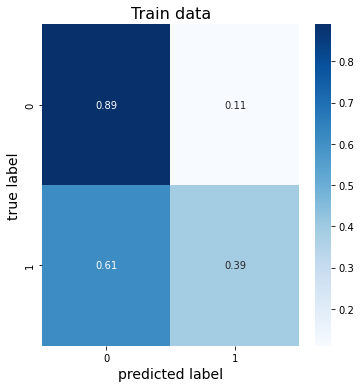

In [ ]:
train_pred = mlpnn_model.predict(tf.convert_to_tensor(train_data_df))
train_pred = np.where(train_pred > 0.5, 1, 0)
train_pred = np.concatenate(train_pred)

train_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(train_target_df), predictions=train_pred).numpy()
train_con_mat_norm = np.around(train_con_mat.astype('float') / train_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
train_con_mat_df = pd.DataFrame(train_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(train_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Train data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

#### **Early stopping:**

In [ ]:
mlpnn_model = models.Sequential()
mlpnn_model.add(layers.Dense(288, input_shape=(8, ), activation='relu'))
mlpnn_model.add(layers.Dense(144, activation='relu'))
mlpnn_model.add(layers.Dense(72, activation='relu'))
mlpnn_model.add(layers.Dense(36, activation='relu'))
mlpnn_model.add(layers.Dense(18, activation='relu'))
mlpnn_model.add(layers.Dropout(0.5))
mlpnn_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
mlpnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlpnn_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 288)               2592      
                                                                 
 dense_45 (Dense)            (None, 144)               41616     
                                                                 
 dense_46 (Dense)            (None, 72)                10440     
                                                                 
 dense_47 (Dense)            (None, 36)                2628      
                                                                 
 dense_48 (Dense)            (None, 18)                666       
                                                                 
 dropout_5 (Dropout)         (None, 18)                0         
                                                                 
 dense_49 (Dense)            (None, 1)               

In [ ]:
mlpnn_model_history = mlpnn_model.fit(x=tf.convert_to_tensor(train_data_df),
                                      y=tf.convert_to_tensor(train_target_df), 
                                      batch_size=50, 
                                      validation_data=(tf.convert_to_tensor(val_data_df), 
                                                       tf.convert_to_tensor(val_target_df)), 
                                      epochs=1000, 
                                      verbose=1,
                                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)])
print(mlpnn_model_history.history)

Epoch 1/1000
198/198 [==============================] - 3s 10ms/step - loss: 0.6931 - accuracy: 0.4982 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/1000
198/198 [==============================] - 1s 4ms/step - loss: 0.6924 - accuracy: 0.4987 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/1000
198/198 [==============================] - 1s 4ms/step - loss: 0.6919 - accuracy: 0.4994 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 4/1000
198/198 [==============================] - 1s 4ms/step - loss: 0.6917 - accuracy: 0.4988 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 5/1000
198/198 [==============================] - 1s 4ms/step - loss: 0.6909 - accuracy: 0.4993 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 6/1000
198/198 [==============================] - 1s 4ms/step - loss: 0.6905 - accuracy: 0.4996 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 7/1000
198/198 [==============================] - 1s 4ms/step - loss: 0.6904 - accuracy: 0.5005 - val_loss: 0.6917 - val_accuracy

In [ ]:
mlpnn_model.evaluate(tf.convert_to_tensor(test_data_df), 
                     tf.convert_to_tensor(test_target_df))

16/16 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5640


[0.6794014573097229, 0.5640000104904175]

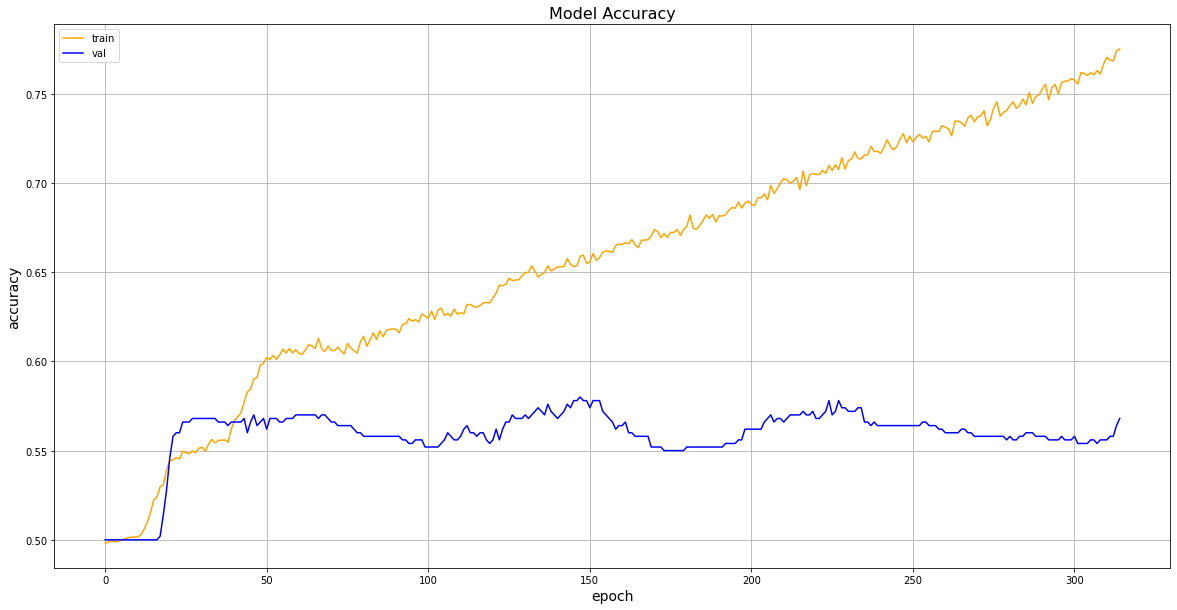

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['accuracy'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_accuracy'], color='blue',label='val')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

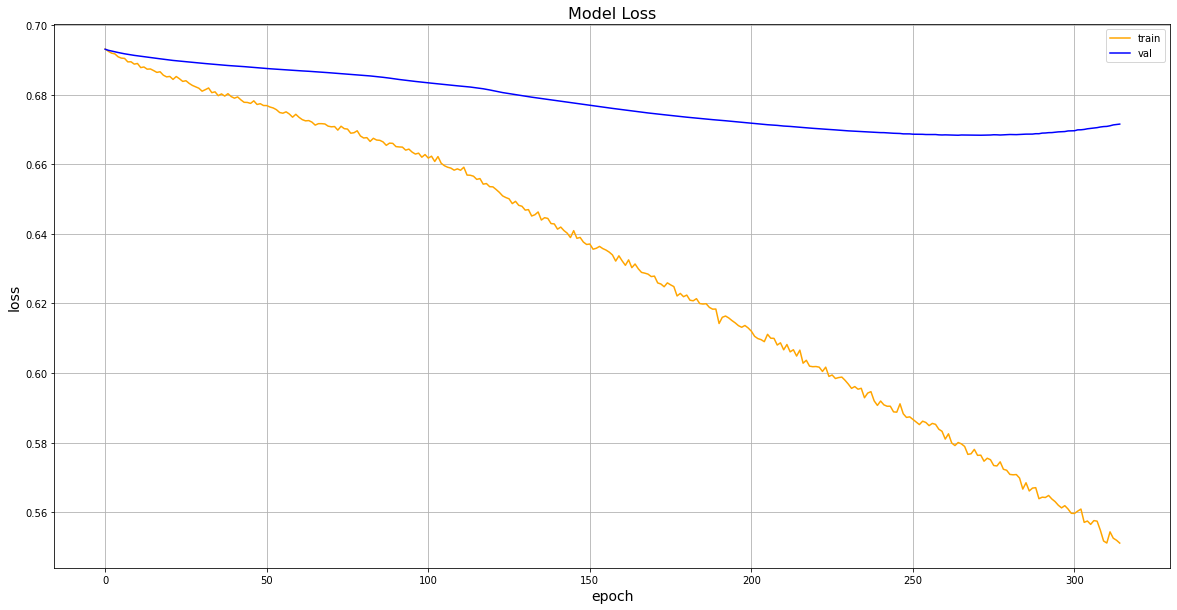

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(mlpnn_model_history.history['loss'], color='orange', label='train')
plt.plot(mlpnn_model_history.history['val_loss'], color='blue',label='val')
plt.title('Model Loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.legend()
plt.show()

16/16 [==============================] - 0s 2ms/step


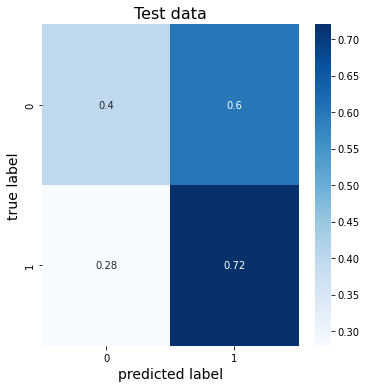

In [ ]:
test_pred = mlpnn_model.predict(tf.convert_to_tensor(test_data_df))
test_pred = np.where(test_pred > 0.5, 1, 0)
test_pred = np.concatenate(test_pred)

test_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(test_target_df), predictions=test_pred).numpy()
test_con_mat_norm = np.around(test_con_mat.astype('float') / test_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
test_con_mat_df = pd.DataFrame(test_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(test_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Test data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

308/308 [==============================] - 1s 2ms/step


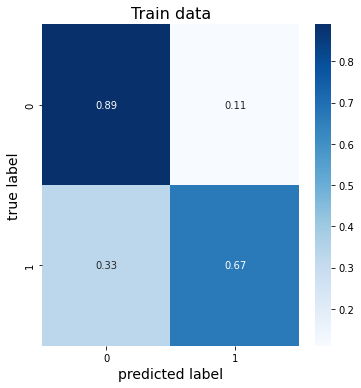

In [ ]:
train_pred = mlpnn_model.predict(tf.convert_to_tensor(train_data_df))
train_pred = np.where(train_pred > 0.5, 1, 0)
train_pred = np.concatenate(train_pred)

train_con_mat = tf.math.confusion_matrix(labels=tf.convert_to_tensor(train_target_df), predictions=train_pred).numpy()
train_con_mat_norm = np.around(train_con_mat.astype('float') / train_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
train_con_mat_df = pd.DataFrame(train_con_mat_norm, index = [0, 1], columns = [0, 1])

figure = plt.figure(figsize=(5, 5))
sb.heatmap(train_con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Train data', fontsize=16)
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()